
# Lending Club Case Study

## 1. Case Study Problem Statement

Lending Club, a marketplace specializing in consumer finance and offering various loans to urban customers, is confronted with a crucial challenge in managing its loan approval process. The company faces the task of making sound decisions to minimize financial losses, particularly from loans provided to applicants classified as "risky."

Credit losses, which are the main concern, occur when borrowers fail to repay their loans or default. In simpler terms, borrowers identified as "charged-off" are responsible for the most significant losses to the company.



## 2. Case Study Objective

The main goal here is to help Lending Club reduce credit losses. This challenge is underscored by two potential scenarios:

2.1. It is essential to identify applicants who are likely to repay their loans as they can bring profits to the company through interest payments. Turning away such applicants could mean losing out on potential business.

2.2. Conversely, approving loans for applicants who are not likely to repay and are at risk of default could result in substantial financial losses for the company.

## 3.Case Study Details

This case detail is going to focus broadly on following areas of EDA, 

### 3.1. Data Cleaning
        
     Idenityy invalid/null values in data and drop them.
     Identify columns which can not contribute in analysis and drop them.
     Identify rows which can not contribute in analysis and drop them. 
     
### 3.2 Data Manipulation

     Covert to data types which are needed for analysis.
     Treat dates to have consistemnt structure.
     Remove unwanted characters from particular columns. 
     
### 3.3 Identify and remove outliers

### 3.4 Create appropriate derived variables

### 3.5 Univariate Analysis

      Identify ordered and unordered categorical variables.
      Identify quantitative variables and analyse them.
      Create segments of quantitative variables and perform segmented univariate analysis.
      
### 3.6 Bivariate Analysis
  
      Compare variables with each other to find their correlation/relationship.
      Find out patterns and plot them.

### 3.7 Result

      Analyse all of the patterns/relationships/correlations between variables and provide educated observations.
      Observations should be clear and concise for business to understand and to act on them.
     

          
    

In [250]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
      

In [251]:
# reading data set and displaying first 5 rows
df_loan = pd.read_csv('loan.csv')
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [252]:
#checking dimensions of data set
df_loan.shape

(39717, 111)

This data set has 39717 rows and 111 column

# Data Cleaning Section

In [253]:
#checking null values in dataset
df_loan.isna().sum(axis=0).sort_values()

id                                0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
                              ...  
avg_cur_bal                   39717
bc_open_to_buy                39717
bc_util                       39717
mo_sin_old_rev_tl_op          39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [254]:
#calculating total number of nulls for each column to determine unwanted columns
df_loan_null = df_loan.isna().sum()
#columns with nulls more than 0
df_loan_null[df_loan_null > 0]

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

There are many columns with high number of nulls, these columns will have impact on analysis, so dropping them would be good 
idea.
We can drop columns with more than 12000 nulls


In [255]:
#dropping columns with more than 120000 nulls
df_loan = df_loan.drop(df_loan_null[df_loan_null > 12000].keys(), axis=1)
df_loan.shape

(39717, 53)

In [256]:
# Now We will check unique values for all remaining columns
df_loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

We can see there are multiple columns which have only 1 unique value, These columns can be dropped

In [257]:
#function to find columns with 1 unique value
def get_drop_column_list(data_frame, value):
    drop_column_list = []
    for column in data_frame.columns:
        if data_frame[column].nunique() == value:
            drop_column_list.append(column)
    return drop_column_list    


drop_column_list = get_drop_column_list(df_loan,1)
drop_column_list

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [258]:
# drop columns
df_loan.drop(drop_column_list, axis = 1, inplace = True)
df_loan.shape

(39717, 44)

There is one more observation that, "url" and "member_id" has all unique values, We do not need them, id is sufficient to track the records.

In [259]:
#drop url and member_id
df_loan.drop(['url', 'member_id'], axis=1, inplace=True)
#checking shape
df_loan.shape

(39717, 42)

In [260]:
#check duplicate rows
df_loan[df_loan.duplicated()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


There are many columns which does not contribute to loan processing decision making, We will drop them

In [261]:
# Coulmns with no impact onnalysis
drop_columns =[
 'collection_recovery_fee','delinq_2yrs','earliest_cr_line','emp_title','inq_last_6mths','last_credit_pull_d','last_pymnt_amnt',
 'last_pymnt_d', 'open_acc','out_prncp','out_prncp_inv','pub_rec','recoveries','revol_bal','revol_util','title','total_acc',
 'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','zip_code'
]

df_loan.drop(drop_columns, axis = 1, inplace = True)


In [262]:
#checking shape
df_loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

# Records Cleaning

In [263]:
#analyzing unique value of loan_status column
df_loan["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

Dropping records where loan_status = 'Current'
The loan in progress cannot provide us insights on risk associated with application.

In [264]:
#Drop records
df_loan = df_loan[df_loan['loan_status'].str.lower() != "current"]
#checking shape
df_loan.shape

(38577, 19)

# Data Manipulation

In [265]:
# Analyzing data inconsitencies
df_loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [266]:
#analyzing data types
df_loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [267]:
#analyzing interest rates
df_loan["int_rate"]

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object

We are going to focus on 3 columns "issue_d" , "int_rate" , "emp_length". These columns needs standardization and data type conversion.

In [268]:
#converting issue_d column data type to date type
df_loan['issue_d'] = pd.to_datetime(df_loan.issue_d, format='%b-%y')

#stripping '%' value from int_rate and converting to float
df_loan['int_rate'] = df_loan.int_rate.astype(str).str.strip('%').astype(float)

emp_length column is numerical in nautre and is ordered, We should remove characters from it and convert to numerica data type

In [269]:
#check all unique values
df_loan['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [270]:
# null values in emp_length
df_loan['emp_length'].isna().sum()

1033

We are going to make some assumptions to standardize variable emp_length

"< 1 year" can be merged with "1 year data", both combined represent applicants new in their Job. 
"10+ years" can be generalized as 10 years , represnt financially established applicants.
1033 values which does not have any value can be termed as financially self employed applicants, We can merge them with 10 years
bracket.


In [271]:
# function to replace special characters
def replace_multiple_strings(input_string, strings_to_replace, replacement):
    for string in strings_to_replace:
        input_string = input_string.replace(string, replacement)
    return input_string
replace_strings = ['<',' ', 'years', 'year','+']
# replace extra strings
df_loan['emp_length'] = df_loan['emp_length'].apply(lambda x: replace_multiple_strings(str(x),replace_strings,''))
#replace nan string with 0
df_loan['emp_length'] = df_loan['emp_length'].apply(lambda x: replace_multiple_strings(str(x),['nan'],'10'))
# convert 
df_loan['emp_length'] = df_loan['emp_length'].astype('int64')
df_loan['emp_length'].unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

In [272]:
df_loan.emp_length.value_counts()

emp_length
10    9521
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

In [273]:
df_loan.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [274]:
# Imputing values, NONE is same as OTHER
df_loan['home_ownership'].replace('NONE', 'OTHER', inplace = True)

In [275]:
df_loan.verification_status.value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [276]:
#Imputing Source verified as Verified
df_loan['verification_status'].replace('Source Verified', 'Verified', inplace = True)

In [277]:
#Analyzing null values in data set
df_loan.isna().sum()

id                        0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
pub_rec_bankruptcies    697
dtype: int64

In [278]:
#Dropping 697 bankruptcy records as imputation is not feasible
df_loan = df_loan[df_loan.pub_rec_bankruptcies.notna()]

In [279]:
#Analyzing null values in data set
df_loan.isna().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

# Outliers

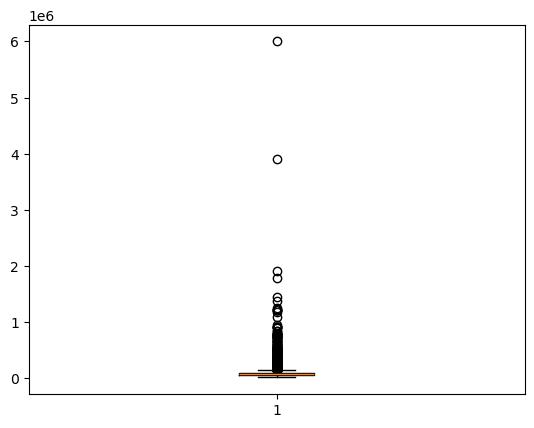

In [280]:
#analyse outliers in annual_inc using boxplot
plt.boxplot(df_loan['annual_inc'])
plt.show()

In [281]:
#describing annual_inc column to get more insite
df_loan.annual_inc.describe()

count    3.788000e+04
mean     6.876387e+04
std      6.357379e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [282]:
df_loan.annual_inc.quantile([0.90, 0.95, 0.97,0.98, 0.99])

0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    186000.0
0.99    234000.0
Name: annual_inc, dtype: float64

Based on box aplot above and distrbution on data We can clearly say there are outlier values which can impact our analysis, It is reasonable to remove values above 95th prrcentile.

In [283]:
#remove values after 95 percentile
df_loan_95 = df_loan['annual_inc'].quantile(0.95)
df_loan = df_loan[df_loan.annual_inc <= df_loan_95]
df_loan.annual_inc.max()


140004.0

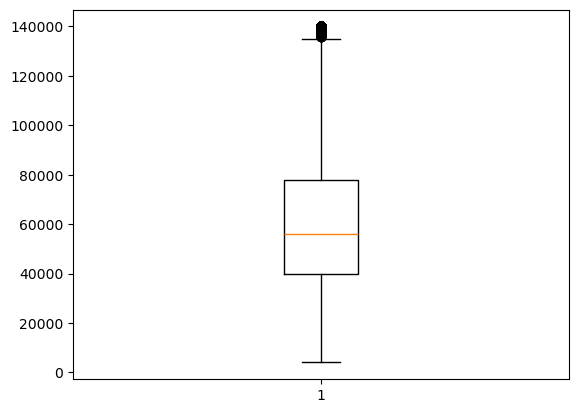

In [284]:
#analyse outliers again
plt.boxplot(df_loan['annual_inc'])
plt.show()

# Derived Variables

In [285]:
#creating new column 'month' and 'year' from 'issue_d' column
df_loan["issue_d_year"] = df_loan.issue_d.dt.year
df_loan['issue_d_month'] = df_loan.issue_d.dt.strftime('%m')

We can calculate approved loan amount percentage 

In [286]:
df_loan['approved_loan_amount_percent'] = round(df_loan['funded_amnt_inv']*100/df_loan['loan_amnt'],2)
df_loan.loan_amnt.describe()

count    35996.000000
mean     10698.617207
std       7061.007275
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [287]:
df_loan["issue_d_month"] = df_loan['issue_d_month'].astype('int64')

Creating bins to analyse quantitative variables

In [288]:
# loan amount bins, helpful in bivariate analysis.
df_loan['loan_amnt_bin'] = pd.cut(df_loan['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 35000], labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k+'])

# annual income bins, helpful in bivariate analysis.
df_loan['annual_inc_bin'] = pd.cut(df_loan['annual_inc'], [0, 20000, 40000, 60000, 80000,150000], labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k+'])

# interest rate bins, helpful in bivariate analysis..
df_loan['int_rate_bin'] = pd.cut(df_loan['int_rate'], [5, 10, 15, 20, 25], labels=['5-10', '10-15', '15-20', '20-25'])

# dti bins, helpful in bivariate analysis.
df_loan['dti_bin'] = pd.cut(df_loan['dti'], [-1, 5, 10, 15, 20, 25, 30], labels=['0-5', '05-10', '10-15', '15-20', '20-25','25-30'])

# Issuer quarter based on month of issue
df_loan['issue_month_bin'] = pd.cut(df_loan['issue_d_month'], [0, 3, 6, 9 ,12], labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [289]:
# assigning the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
df_loan['loan_status_flag'] = df_loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
df_loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pub_rec_bankruptcies,issue_d_year,issue_d_month,approved_loan_amount_percent,loan_amnt_bin,annual_inc_bin,int_rate_bin,dti_bin,issue_month_bin,loan_status_flag
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,0.0,2011,12,99.5,0-5k,20k-40k,10-15,25-30,Q4,0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,0.0,2011,12,100.0,0-5k,20k-40k,15-20,0-5,Q4,1
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,0.0,2011,12,100.0,0-5k,0-20k,15-20,05-10,Q4,0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,0.0,2011,12,100.0,5k-10k,40k-60k,10-15,15-20,Q4,0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,...,0.0,2011,12,100.0,0-5k,20k-40k,5-10,10-15,Q4,0


In [290]:
#Analyzing null values in data set
df_loan.isna().sum()

id                              0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
addr_state                      0
dti                             0
pub_rec_bankruptcies            0
issue_d_year                    0
issue_d_month                   0
approved_loan_amount_percent    0
loan_amnt_bin                   0
annual_inc_bin                  0
int_rate_bin                    0
dti_bin                         0
issue_month_bin                 0
loan_status_flag                0
dtype: int64

# Univariate Analysis

Following variables are indentified for univariate analysis

1. Categorical variables
	
    1.Ordered categorical data
		1. grade
		2. sub_grade
		3. term
		4. emp_length
		5. issue_d_year
		6. issue_d_month
        7. issue_month_bin
			
		
	2. Unordered categorical data
		1. addr_state
		2. purpose
		3. home_ownership
		4. loan_status
        5. loan_status_flag
        6. verification_status
		
		
2. Quantitative and Derived Variables
		1. approved_loan_amount_percent
		2. loan_amnt_bin  
		3. annual_inc_bin 
		4. int_rate_bin
		5. dti_bin
        6. installmets

## Quantitative Variables

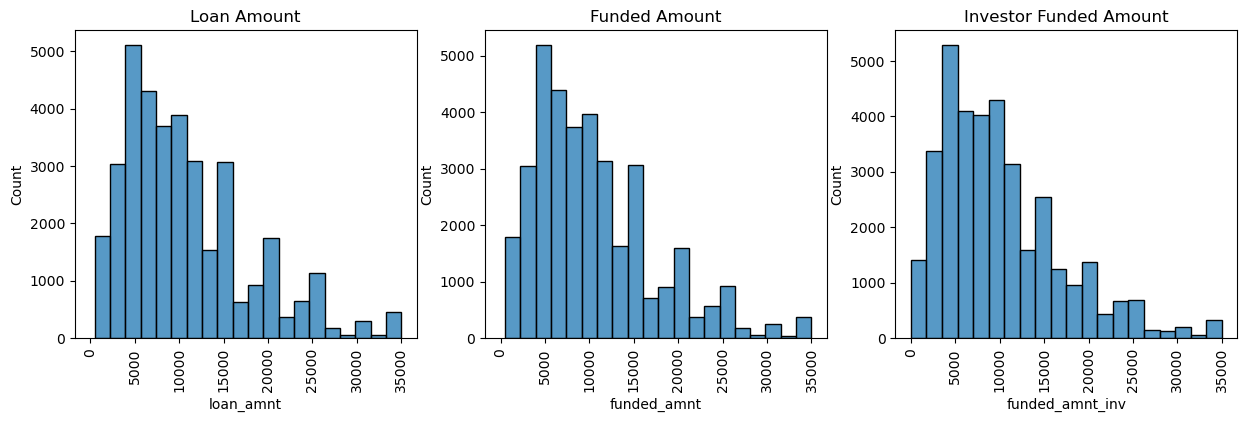

In [291]:
figure, axes = plt.subplots(1, 3, sharex=True,
                            figsize=(15, 4))

axes[0].set_title('Loan Amount')
axes[0].tick_params(axis='x', rotation=90)
axes[1].set_title('Funded Amount')
axes[1].tick_params(axis='x', rotation=90)
axes[2].set_title('Investor Funded Amount')
axes[2].tick_params(axis='x', rotation=90)


#Distribution plot
sns.histplot(df_loan, x="loan_amnt", bins = 20, ax=axes[0])

#Distribution plot
sns.histplot(df_loan, x="funded_amnt", bins = 20, ax=axes[1])

#Distribution plot
sns.histplot(df_loan, x="funded_amnt_inv", bins = 20, ax=axes[2])
figure.show()



### Observation : Distribution of these variables is similar, We can pick "Loan Amout" for detailed analysis

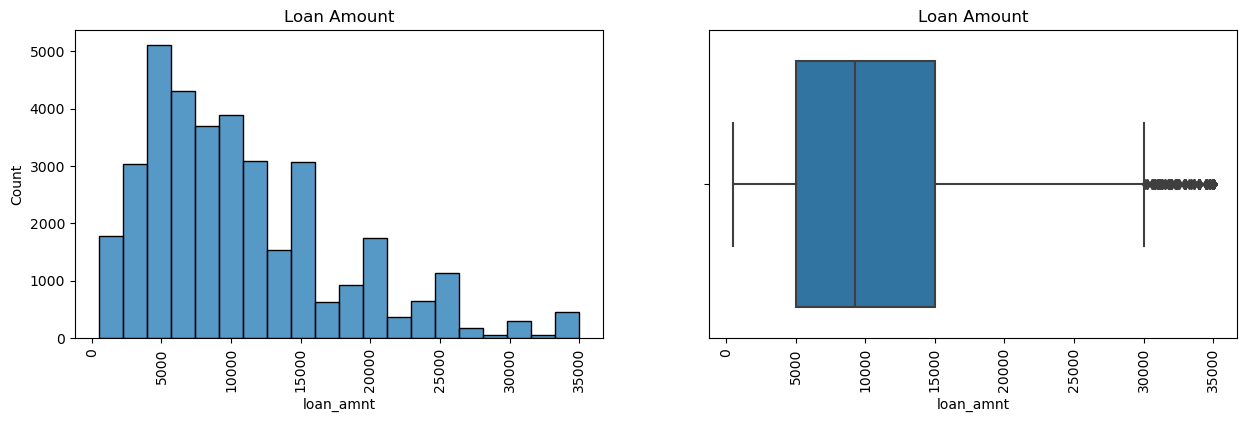

In [292]:
# Loan Amount Plot
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(15, 4))

axes[0].set_title('Loan Amount')
axes[0].tick_params(axis='x', rotation=90)
axes[1].set_title('Loan Amount')
axes[1].tick_params(axis='x', rotation=90)



#Distribution plot
sns.histplot(df_loan, x="loan_amnt", bins = 20, ax=axes[0])

#Distribution plot
sns.boxplot(df_loan, x="loan_amnt", ax=axes[1])

figure.show()


### Observation : From loan amount data, we can say that most of them have taken their loan between 5000 and 15000.

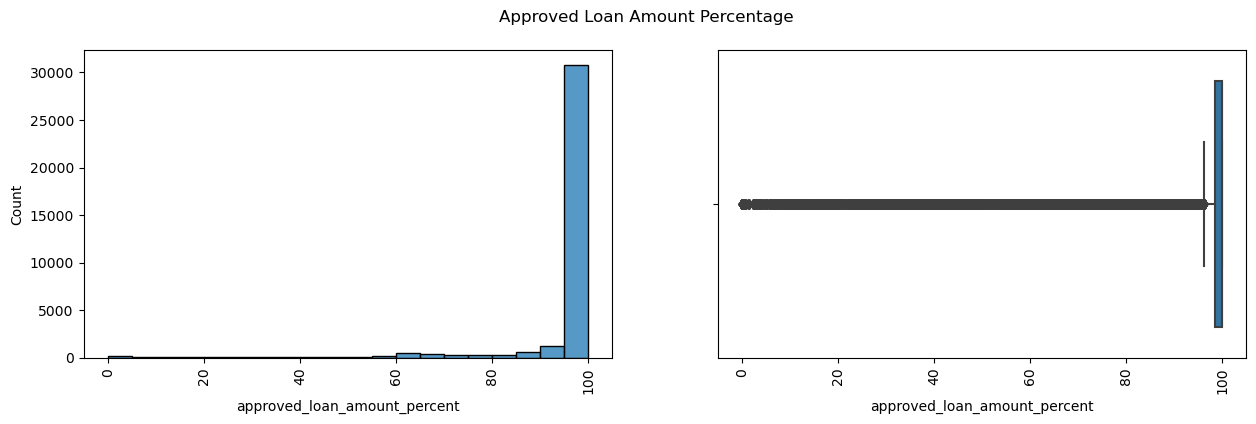

In [293]:
# Loan Amount approval percentage plot
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(15, 4))
figure.suptitle('Approved Loan Amount Percentage')

axes[0].tick_params(axis='x', rotation=90)

axes[1].tick_params(axis='x', rotation=90)



#Distribution plot
sns.histplot(df_loan, x="approved_loan_amount_percent", bins= 20, ax=axes[0])

#Distribution plot
sns.boxplot(df_loan, x="approved_loan_amount_percent", ax=axes[1])

figure.show()


### Observation : Majority of borrowers got 100% loan amount from investor

# Analyze Interest Rate

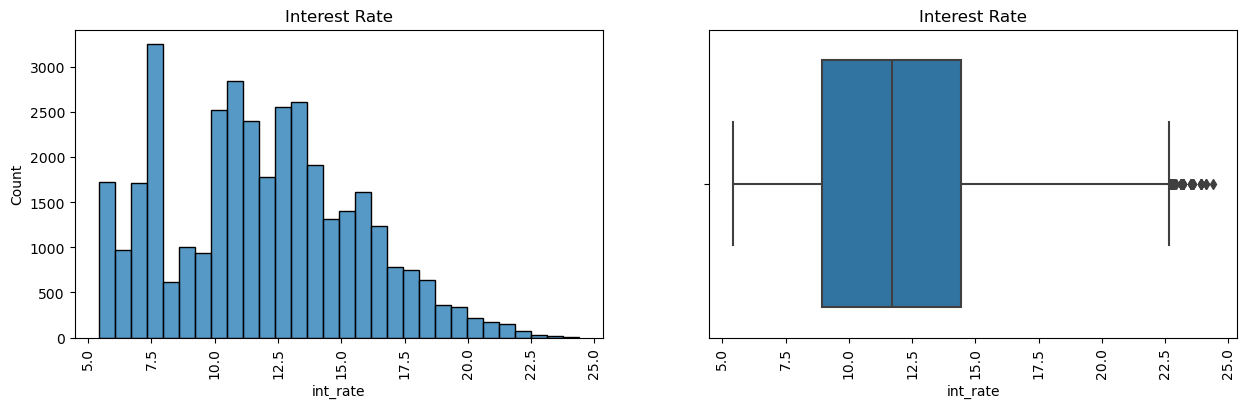

In [294]:
# Interest Rate Plot
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(15, 4))

axes[0].set_title('Interest Rate')
axes[0].tick_params(axis='x', rotation=90)
axes[1].set_title('Interest Rate')
axes[1].tick_params(axis='x', rotation=90)



#Distribution plot
sns.histplot(df_loan, x="int_rate", bins = 30, ax=axes[0])

#Distribution plot
sns.boxplot(df_loan, x="int_rate", ax=axes[1])

figure.show()

###  For majority of borrowers, interest rate lies between 10% to 15%.
###  7.5% Interest rate is given to highest number of borrowers.


# Analyzing Annual Income

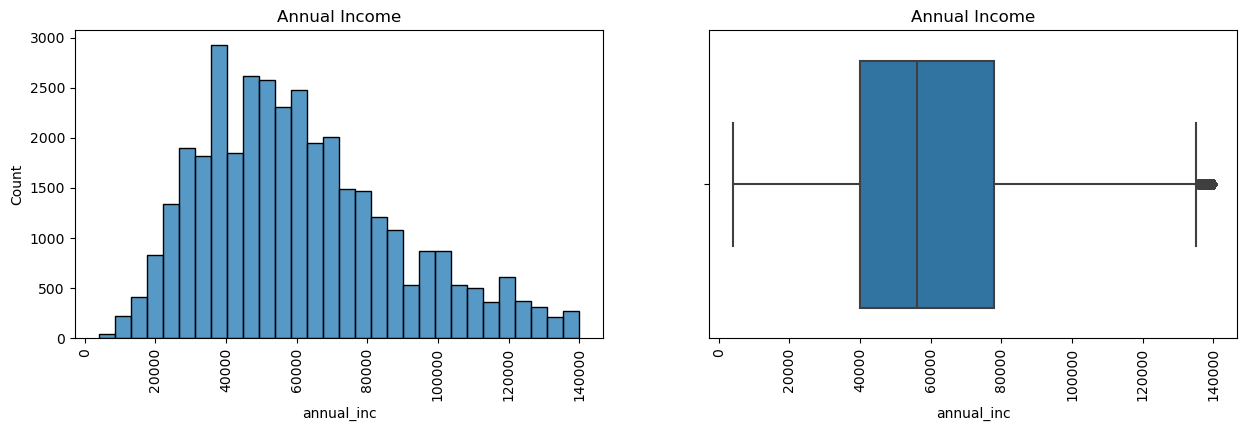

In [295]:
# Anuual Income  Plot
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(15, 4))

axes[0].set_title('Annual Income')
axes[0].tick_params(axis='x', rotation=90)
axes[1].set_title('Annual Income')
axes[1].tick_params(axis='x', rotation=90)



#Distribution plot
sns.histplot(df_loan, x="annual_inc", bins = 30, ax=axes[0])

#Distribution plot
sns.boxplot(df_loan, x="annual_inc", ax=axes[1])

figure.show()

### Observation : Majority of borrower's income falls in range 40k - 80k 

# Loan Issue quarter wise

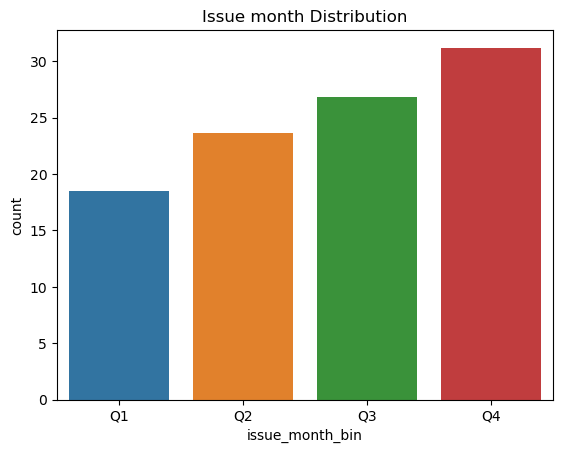

In [296]:
# Converting issue percentage quarter wise
issue_percentage_quarter_wise = df_loan["issue_month_bin"].value_counts(normalize=True).mul(100).round(1).reset_index()

#barplot
sns.barplot(data=issue_percentage_quarter_wise, x="issue_month_bin", y="proportion")
plt.ylabel('count')
plt.title('Issue month Distribution')
plt.show()

### Observation :  We can say Loan Issue is increasing from Jan-Dec and, most of the loan issues are Q4, because of bonus payemnts and holidays.

# Debt-to-income analysis

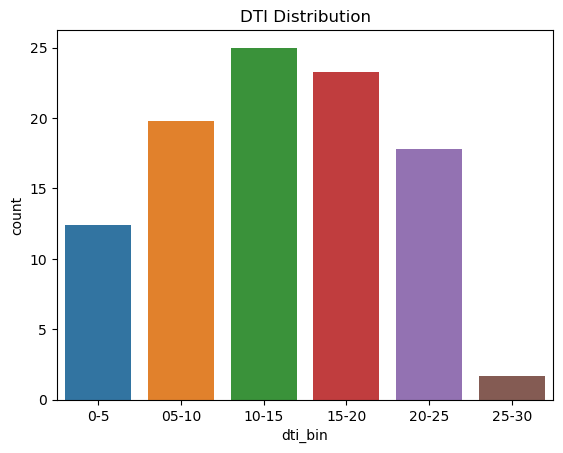

In [297]:
# Converting dti ration in percentages
dti_distribution = df_loan["dti_bin"].value_counts(normalize=True).mul(100).round(1).reset_index()

#barplot
sns.barplot(data=dti_distribution, x="dti_bin", y="proportion")
plt.ylabel('count')
plt.title('DTI Distribution')
plt.show()

## Observation : ~50% of the applications have 10-20% DTI ratio.

In [298]:
# Loan Issue Yearly

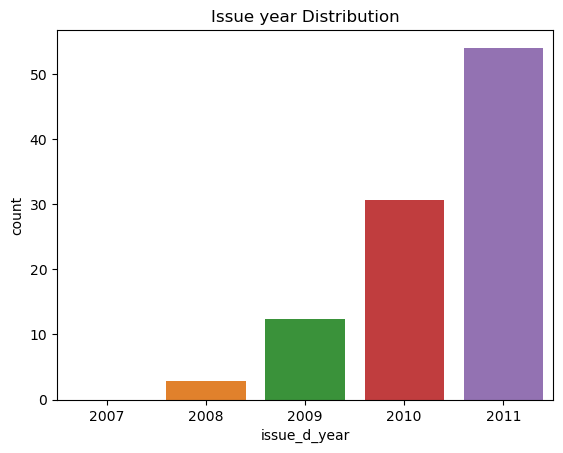

In [299]:
# Converting issue percentage yearly
issue_percentage_quarter_wise = df_loan["issue_d_year"].value_counts(normalize=True).mul(100).round(1).reset_index()

#barplot
sns.barplot(data=issue_percentage_quarter_wise, x="issue_d_year", y="proportion")
plt.ylabel('count')
plt.title('Issue year Distribution')
plt.show()

### Observation: Loan issue count is increasing yearly with a very healthy rate.

# Unordered Categorical Variables

## Loan Status

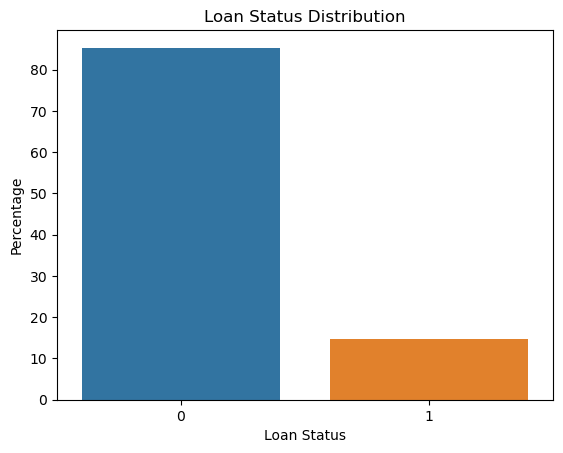

In [300]:
#converting value_count into percentage
loan_status_perecentage= df_loan["loan_status_flag"].value_counts(normalize=True).mul(100).round(1).reset_index()
#barplot
sns.barplot(data=loan_status_perecentage, x="loan_status_flag", y="proportion")
plt.xlabel("Loan Status")
plt.ylabel('Percentage')
plt.title('Loan Status Distribution')
plt.show()

###  Around 85% borrowers fully paid and around 15% were charged off. (approx values) 

# Analyzing Purpose of Loan

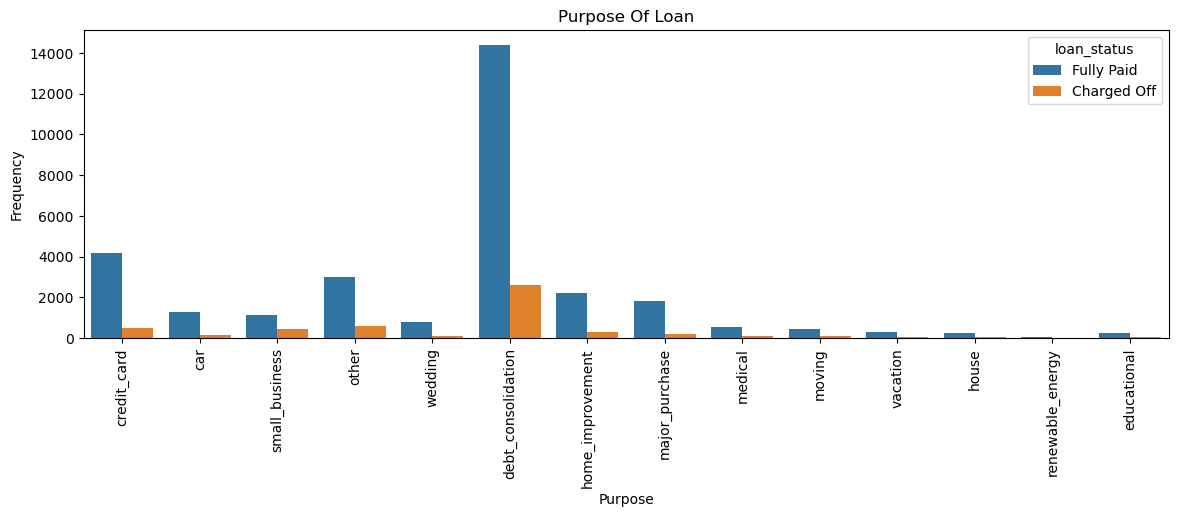

In [301]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x="purpose", data=df_loan, hue= 'loan_status')
ax.set_title('Purpose Of Loan')
ax.set_ylabel('Frequency')
ax.set_xlabel('Purpose')  
plt.xticks(rotation=90)
plt.show()

###  Observations

Clearing existing debt and cedit card payments are main purpose for taking loan and charged off loans are maximum for debt consolidation.

# Home Ownership

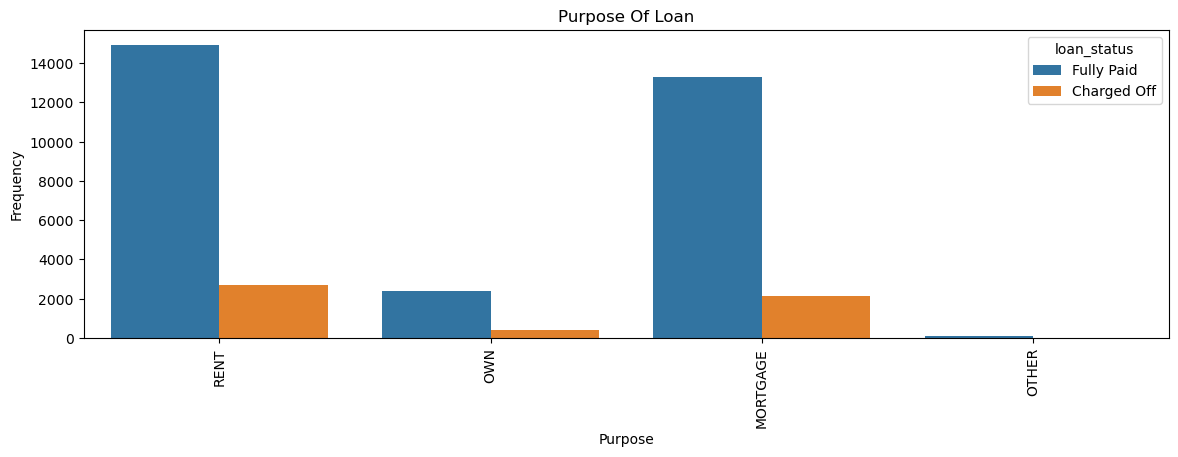

In [302]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x="home_ownership", data=df_loan, hue= 'loan_status')
ax.set_title('Purpose Of Loan')
ax.set_ylabel('Frequency')
ax.set_xlabel('Purpose')  
plt.xticks(rotation=90)
plt.show()

### Observations
 Most of the borrowers have taken loan who are in rent or mortgage their home.
 Charged Off loan status is also high for these two home ownership.

# Ordered Categorical Variables

## Loan term

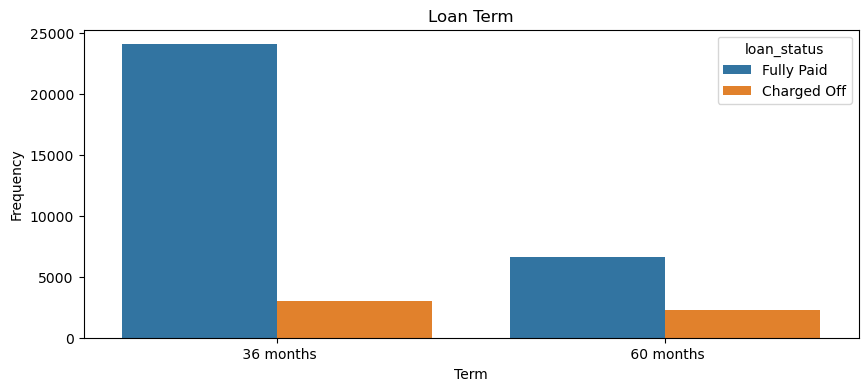

In [303]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="term", data=df_loan, hue= 'loan_status')
ax.set_title('Loan Term')
ax.set_ylabel('Frequency')
ax.set_xlabel('Term')  
plt.show()

### Observation

- Borrowers have opted for 36 month loan term as compared to 60 months.
- Charged off number is higher percentage wise for 60 months term loans.

#  Employment Length

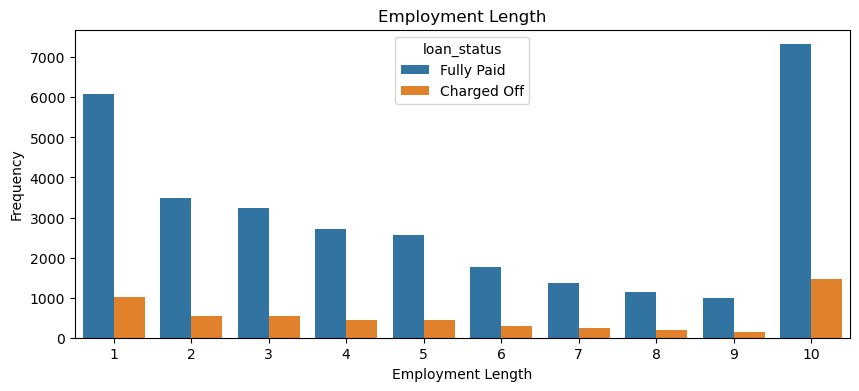

In [304]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="emp_length", data=df_loan, hue= 'loan_status')
ax.set_title('Employment Length')
ax.set_ylabel('Frequency')
ax.set_xlabel('Employment Length')  
plt.show()

### Observation 

- Borrowers with 10+ experience have good record of paying off loan. 
- charged off is also less for this category, percentage wise.
- We have merged < 1 employment length with 1 year, people with <=1 employment length also have good record.

# Grade

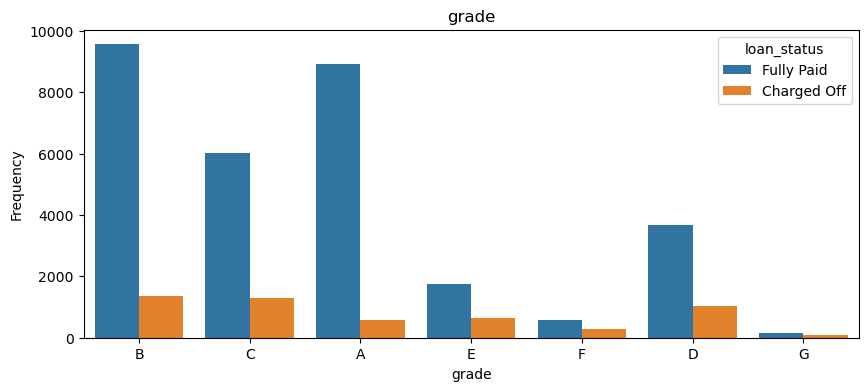

In [305]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="grade", data=df_loan, hue= 'loan_status')
ax.set_title('grade')
ax.set_ylabel('Frequency')
ax.set_xlabel('grade')  
plt.show()

### Observation 
- Grade A, B, C, D have highest number of fully paid loans
- Grade B,C,E,D have majority of charged off loans

# Sub Grade

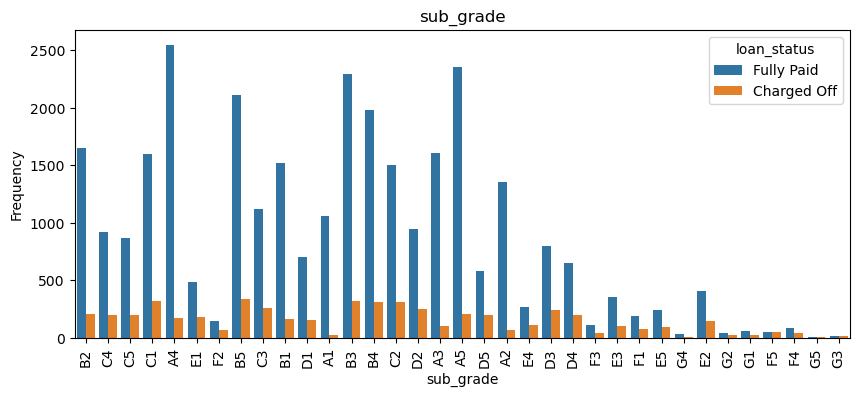

In [306]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="sub_grade", data=df_loan, hue= 'loan_status')
ax.set_title('sub_grade')
ax.set_ylabel('Frequency')
ax.set_xlabel('sub_grade') 
plt.xticks(rotation=90)
plt.show()

### Observation
- Sub Grade B3, B4, B5, D2, D3, D4, C1, C2, C3, E3, E2 contribute maximum to charged off category, liekly to charged off.

# Bivariate Analysis

## Loan amount with  Term, Verification Status, Loan Status, Grade

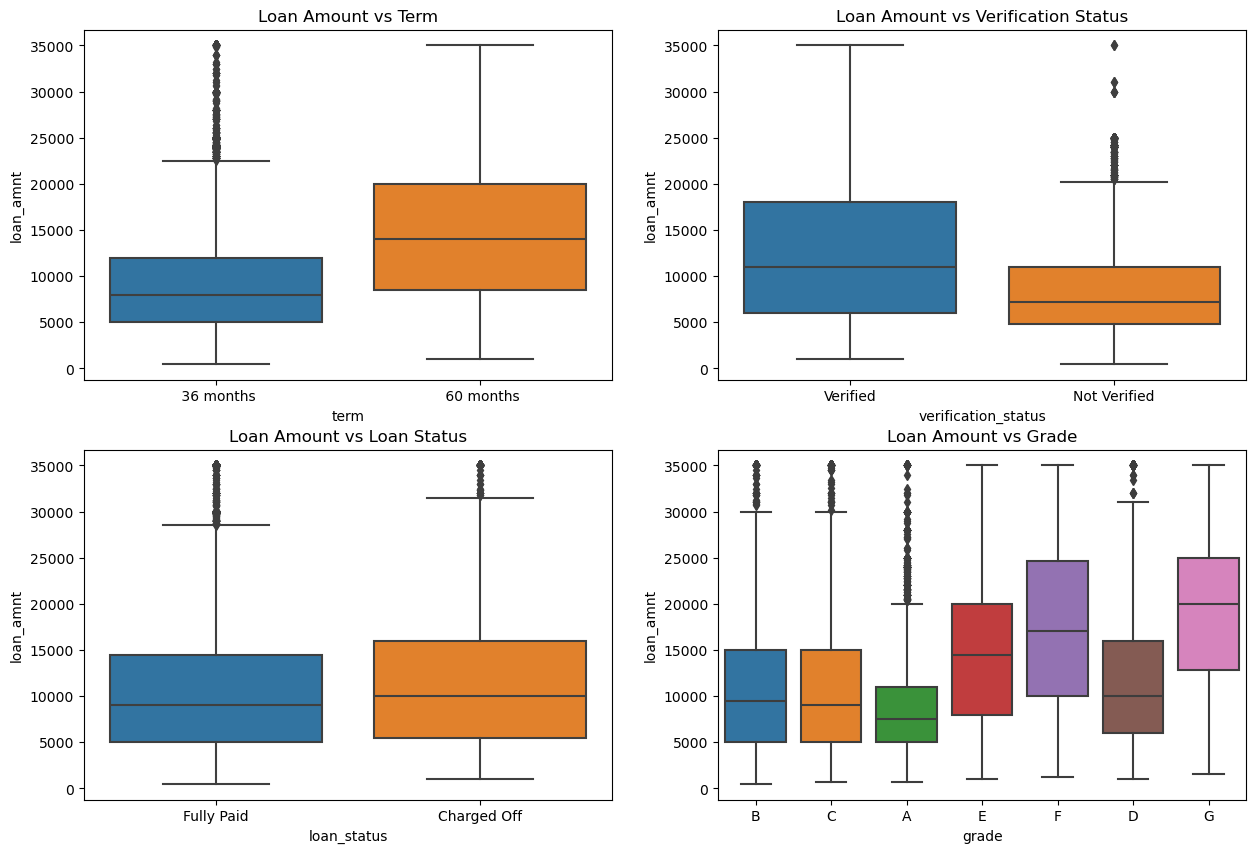

In [307]:
# Interest Rate Plot
figure, axes = plt.subplots(2, 2, sharex=False,
                                    figsize=(15, 10))

axes[0][0].set_title('Loan Amount vs Term')
axes[0][1].set_title('Loan Amount vs Verification Status')
axes[1][0].set_title('Loan Amount vs Loan Status')
axes[1][1].set_title('Loan Amount vs Grade')

#Distribution plot
sns.boxplot(df_loan, x='term', y='loan_amnt', ax=axes[0][0])

#Distribution plot
sns.boxplot(df_loan, x="verification_status", y='loan_amnt',ax=axes[0][1])

#Distribution plot
sns.boxplot(df_loan, x='loan_status', y='loan_amnt', ax=axes[1][0])

#Distribution plot
sns.boxplot(df_loan, x="grade", y='loan_amnt',ax=axes[1][1])

figure.show()

## Observation 
- Term is higher for higher loan amount
- Verfied applications get higher loan amount.
- In loan amount vs Loan status variable we can say that, charged off were having higher loan amount than fully paid.
- In Grade vs loan amount we can say that, grade F & G are having max amount of loan. As the grade decreases amount of loan is increasing.
- From this we can say that higher the grade more is the risk of default.

# Loan amount with Home ownership and Purpose

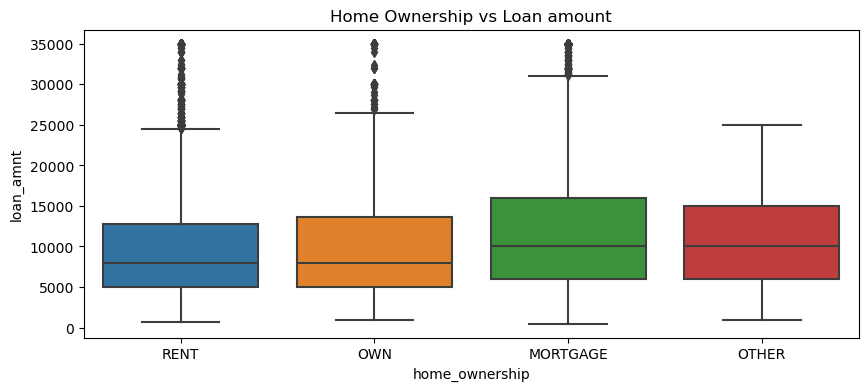

In [308]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="loan_amnt", data=df_loan)
plt.title("Home Ownership vs Loan amount")
plt.show()

# Observations
The borrower who have Mortgage have taken higher amount of loan than others.

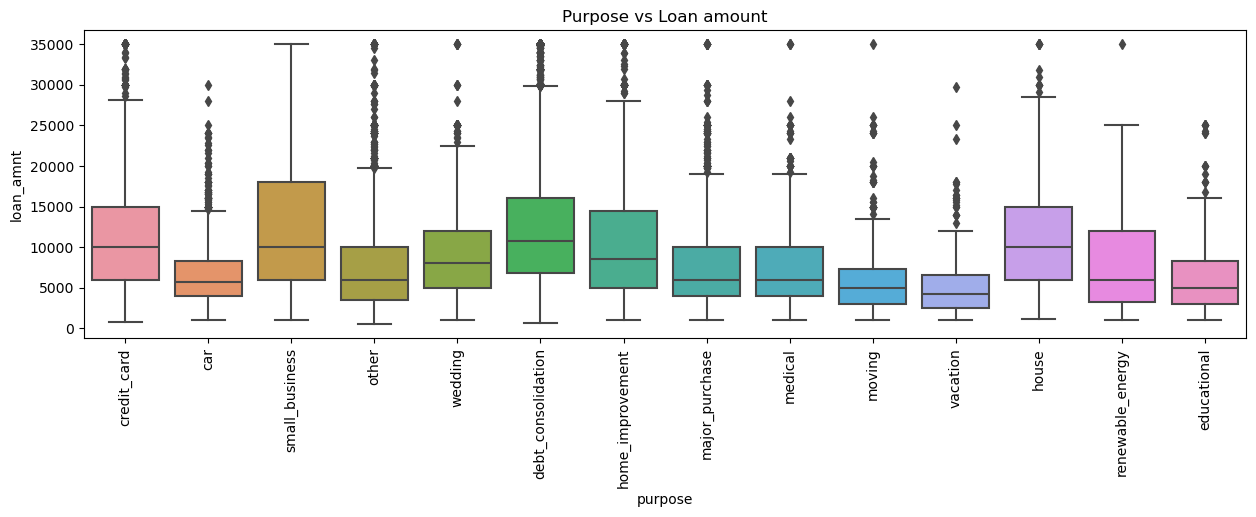

In [309]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="loan_amnt", data=df_loan)
plt.title("Purpose vs Loan amount")
plt.xticks(rotation=90)
plt.show()

# Observations
The startup with small business borrowers are taking high loan than others. Then comes debt_consolidation, then house

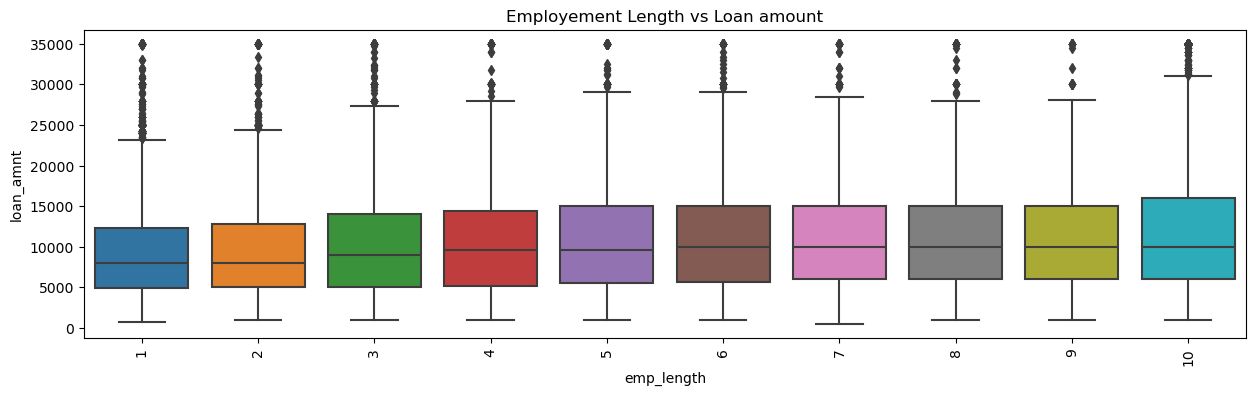

In [310]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="loan_amnt", data=df_loan)
plt.title("Employement Length vs Loan amount")
plt.xticks(rotation=90)
plt.show()

# Observations
- The borrowers who have 10+ years of experience are taking high amount of loan than others 
- The borrowers with less than equal to 1 year of experience are taking lesser amount of loan compared to others.

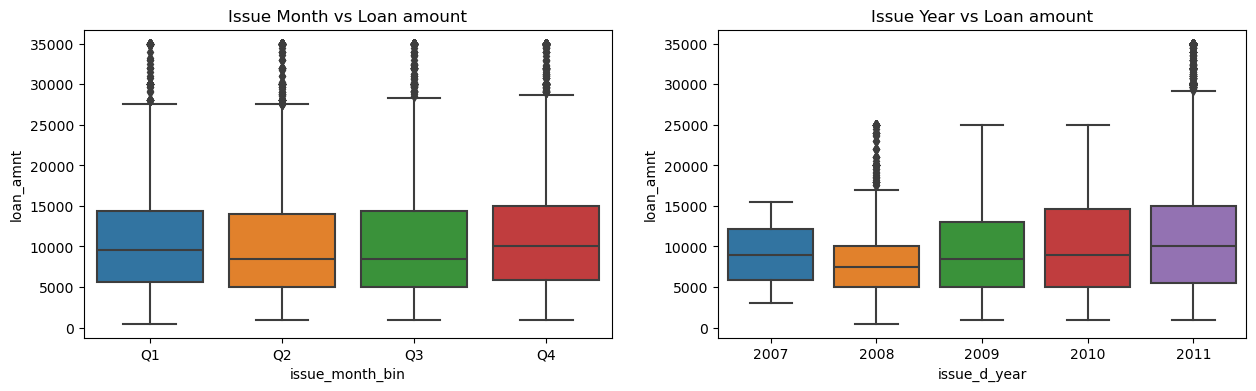

In [311]:
# Anuual Income  Plot
figure, axes = plt.subplots(1, 2, sharex=False,
                            figsize=(15, 4))

axes[0].set_title('Issue Month vs Loan amount')
axes[1].set_title('Issue Year vs Loan amount')

#Distribution plot
sns.boxplot(df_loan, x='issue_month_bin', y='loan_amnt', ax=axes[0])

#Distribution plot
sns.boxplot(df_loan, x='issue_d_year', y='loan_amnt', ax=axes[1])

figure.show()

# Observations
- Highest loan amount is taken in the  Q4 quarterwhereas median value doesn't vary too much.
- Highest loan amount is taken in the year 2008 and 2011 as we can see in outliers by some borrowers. And we can say that median value doesn't vary too much but as the year increases high amount of loans are taken.
- 2008 median is lower than other years, most probably doe to economic slowdown of 2008.

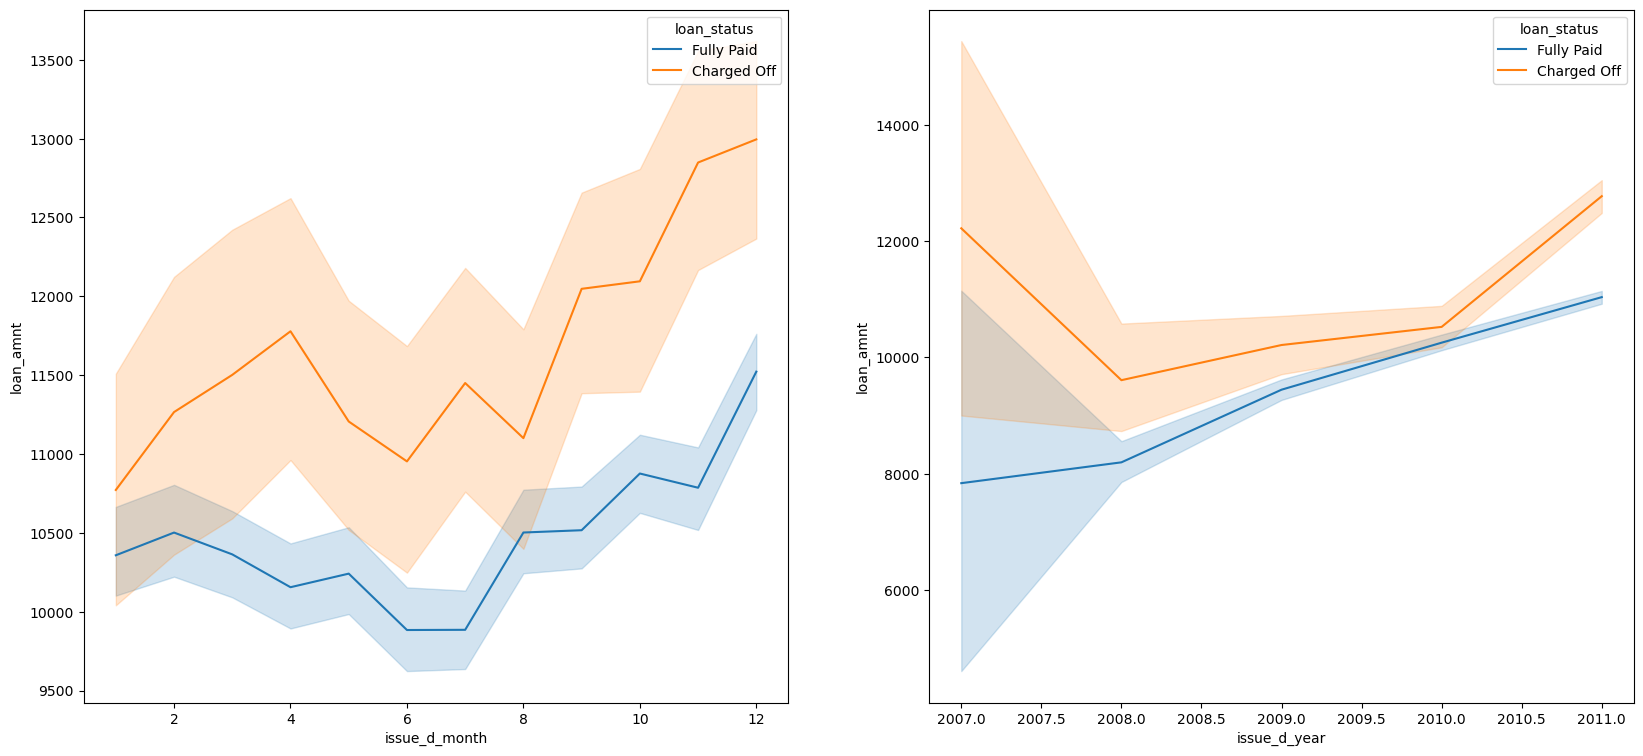

In [312]:
plt.figure(figsize=(20,9))
plt.subplot(121)
sns.lineplot(data =df_loan ,y='loan_amnt', x='issue_d_month', hue ='loan_status')
plt.subplot(122)
sns.lineplot(data =df_loan ,y='loan_amnt', x='issue_d_year', hue ='loan_status')
plt.show()

# Observations
- Higher the loam amount, more is the charged off frequency.
- The borrower who took the loan in the month of november and december are having highest charged off ratio with highest loan amount.

# Annual Income with every variables.

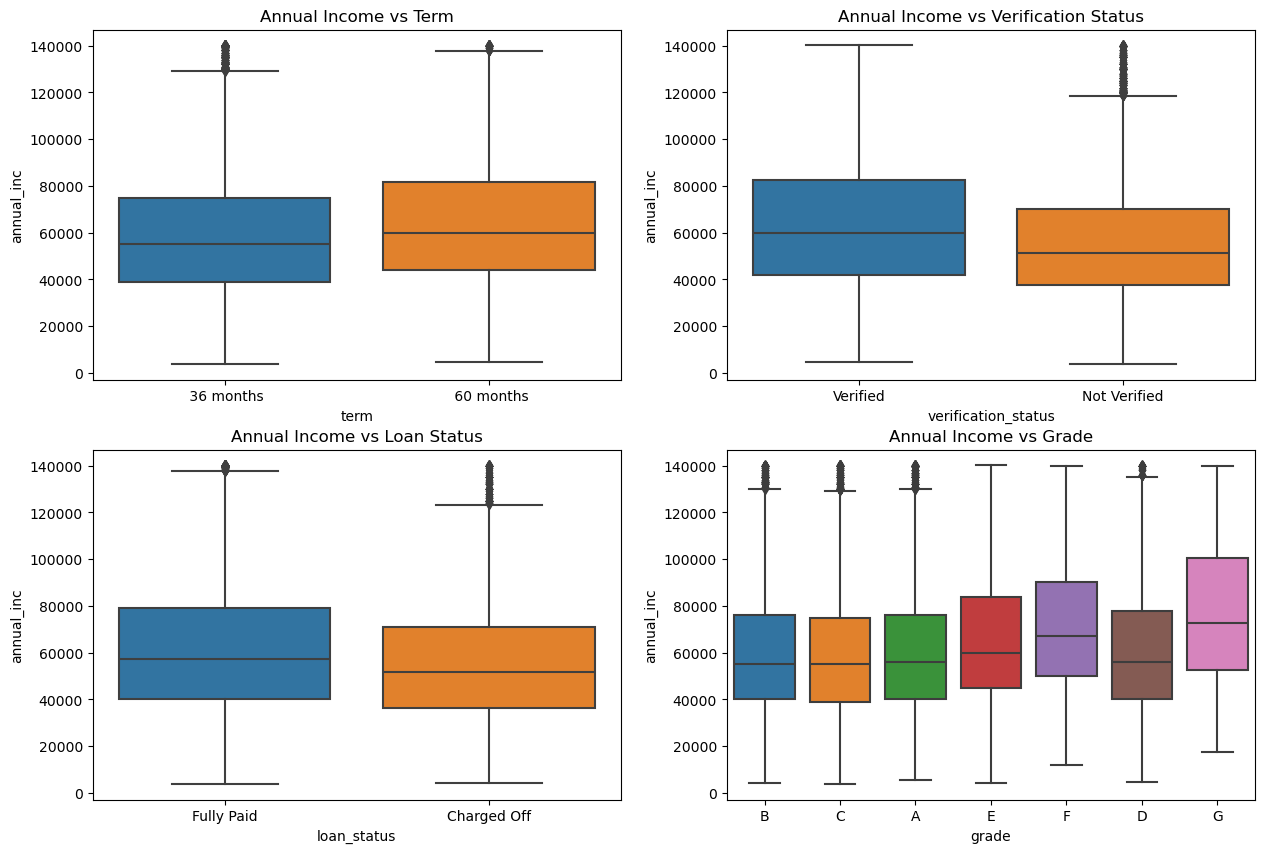

In [313]:
# Annual Income Plot
figure, axes = plt.subplots(2, 2, sharex=False,
                                    figsize=(15, 10))

axes[0][0].set_title('Annual Income vs Term')
axes[0][1].set_title('Annual Income vs Verification Status')
axes[1][0].set_title('Annual Income vs Loan Status')
axes[1][1].set_title('Annual Income vs Grade')

#Distribution plot
sns.boxplot(df_loan, x='term', y='annual_inc', ax=axes[0][0])

#Distribution plot
sns.boxplot(df_loan, x="verification_status", y='annual_inc',ax=axes[0][1])

#Distribution plot
sns.boxplot(df_loan, x='loan_status', y='annual_inc', ax=axes[1][0])

#Distribution plot
sns.boxplot(df_loan, x="grade", y='annual_inc',ax=axes[1][1])

figure.show()

# Observations
- The borrowers who have high annual income are taking loans for 60 months tenure as compared to 36 months.
- Mostly the verified borrowers are having high annual income than others.
- Higher the loan amount higher is the tenure i.e. 60 months. Its median is only 15k whereas the median of 36 month is 8k.
- Borrowers with income more than average are in grade F,G

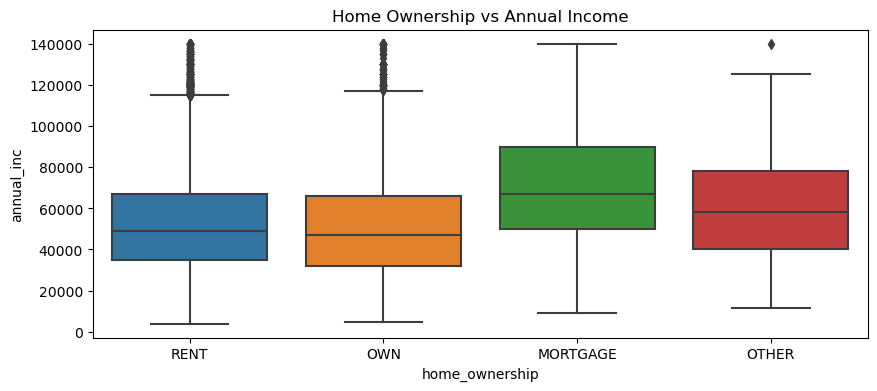

In [314]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="annual_inc", data=df_loan)
plt.title("Home Ownership vs Annual Income")
plt.show()

### The borrowers who have the status as Mortgage are having high annual income than others.

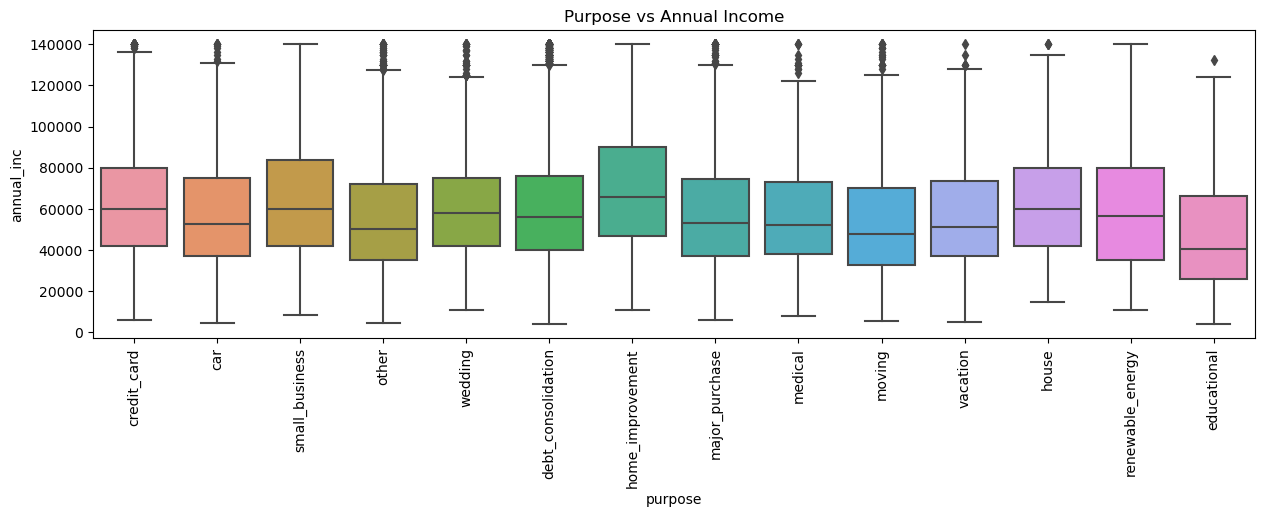

In [315]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="annual_inc", data=df_loan)
plt.title("Purpose vs Annual Income")
plt.xticks(rotation=90)
plt.show()

### The borrowers who has high annual income are taking loans mostly for home improvement and small business.

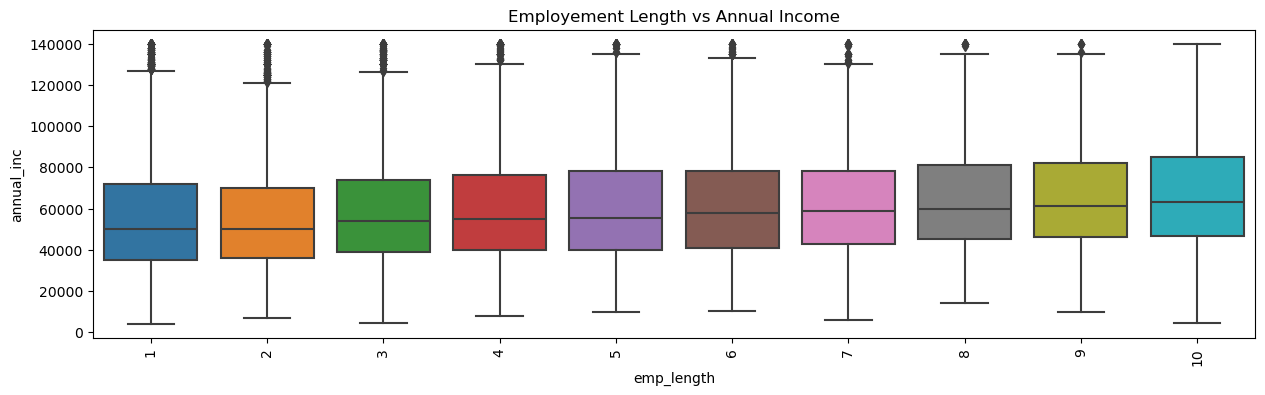

In [316]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="annual_inc", data=df_loan)
plt.title("Employement Length vs Annual Income")
plt.xticks(rotation=90)
plt.show()

# The borrowers who has 10+ experience are having highest annual income than others.

# Interest Rate with every variables.

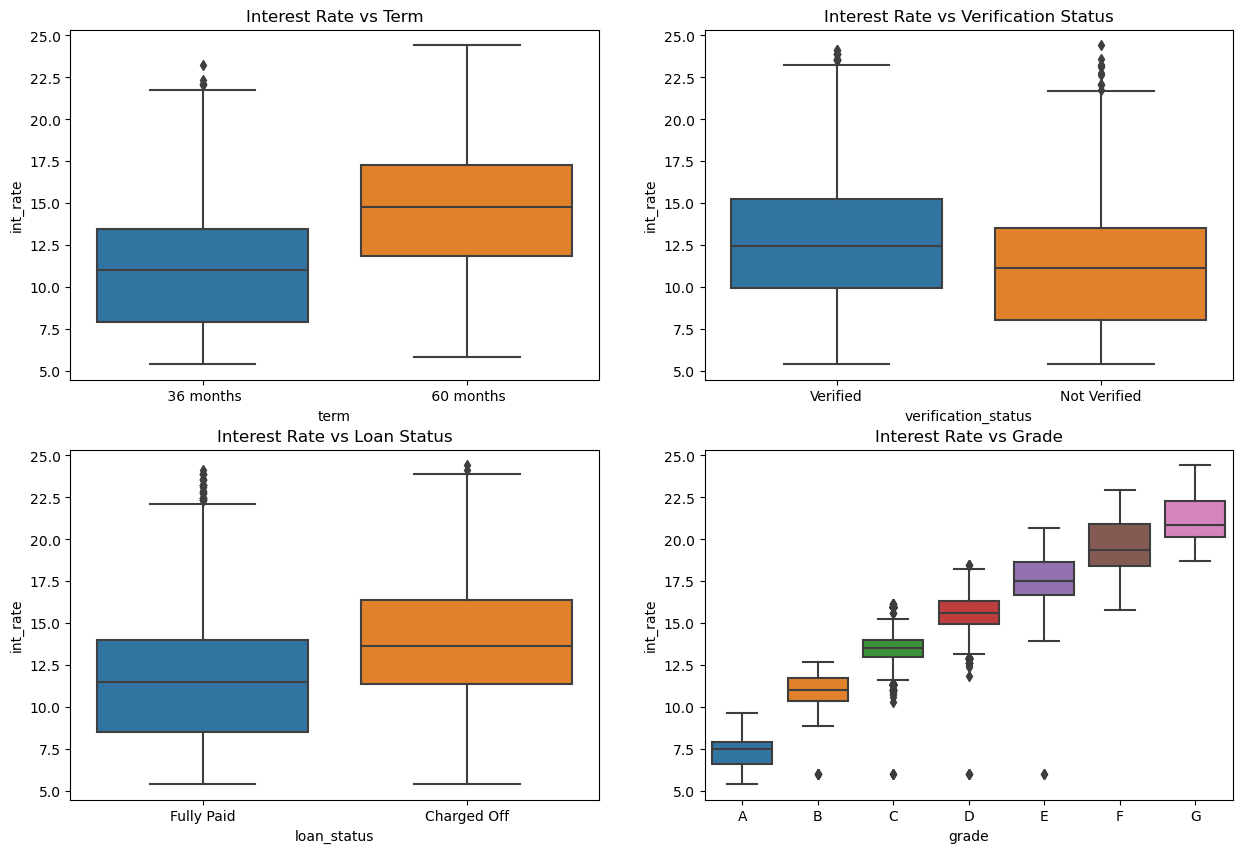

In [317]:
# Interest Rate Plot
figure, axes = plt.subplots(2, 2, sharex=False,
                                    figsize=(15, 10))

axes[0][0].set_title('Interest Rate vs Term')
axes[0][1].set_title('Interest Rate vs Verification Status')
axes[1][0].set_title('Interest Rate vs Loan Status')
axes[1][1].set_title('Interest Rate vs Grade')

#Distribution plot
sns.boxplot(df_loan, x='term', y='int_rate', ax=axes[0][0])

#Distribution plot
sns.boxplot(df_loan, x="verification_status", y='int_rate',ax=axes[0][1])

#Distribution plot
sns.boxplot(df_loan, x='loan_status', y='int_rate', ax=axes[1][0])

grade_order = df_loan["grade"].unique()
grade_order.sort()
#Distribution plot
sns.boxplot(df_loan, x="grade", y='int_rate',order= grade_order, ax=axes[1][1])

figure.show()

- Interest rate is less for those who take loan for 36 months and high for 60 months.
- Verified borrower gets more loan at higher interest rate compared to others.
- The borrowers who has high interest rate are mostly defaulters.
- The grade decreases, interest rate is increasing.

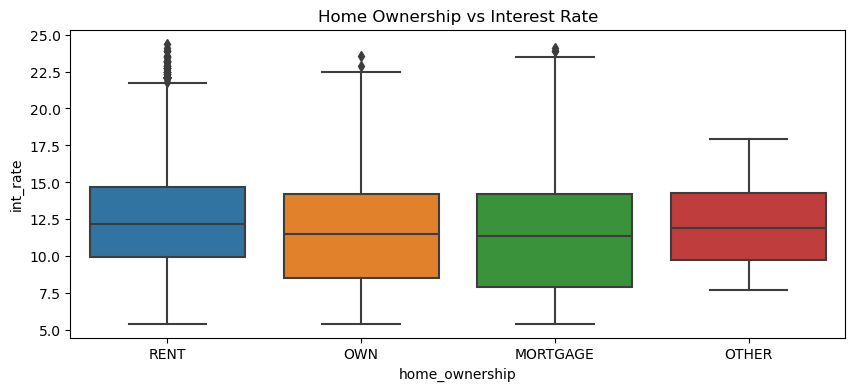

In [318]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="int_rate", data=df_loan)
plt.title("Home Ownership vs Interest Rate")
plt.show()

### The borrowers who are in rent are getting high interest rate. The borrowers with own and mortgage are getting loan with less interest rate also due to security purpose.

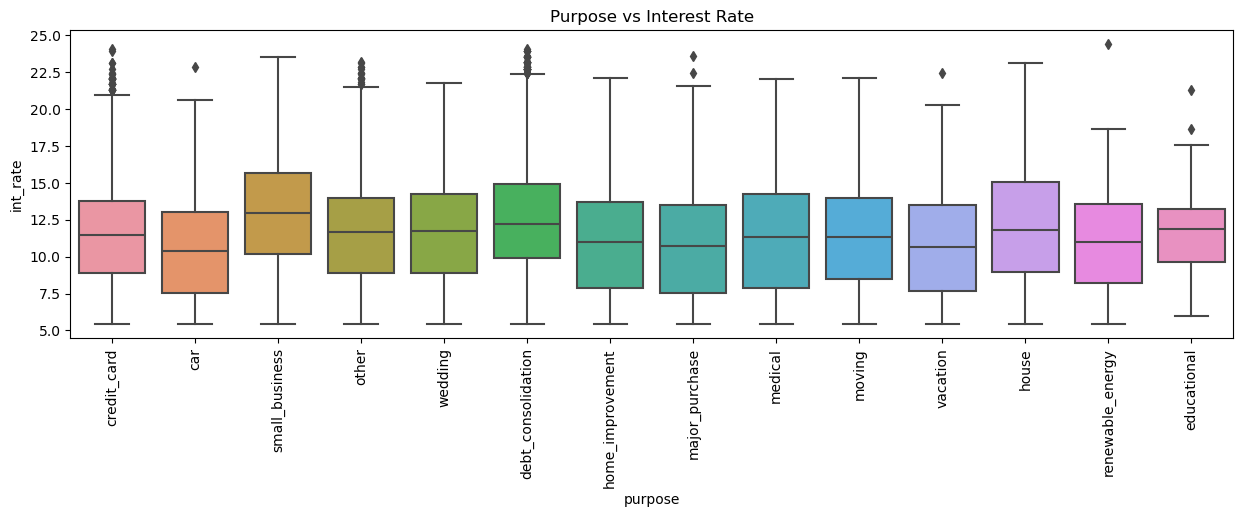

In [319]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="int_rate", data=df_loan)
plt.title("Purpose vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

###  small business , debt consolidation and house loan are geeting loan at high interest rate than others.

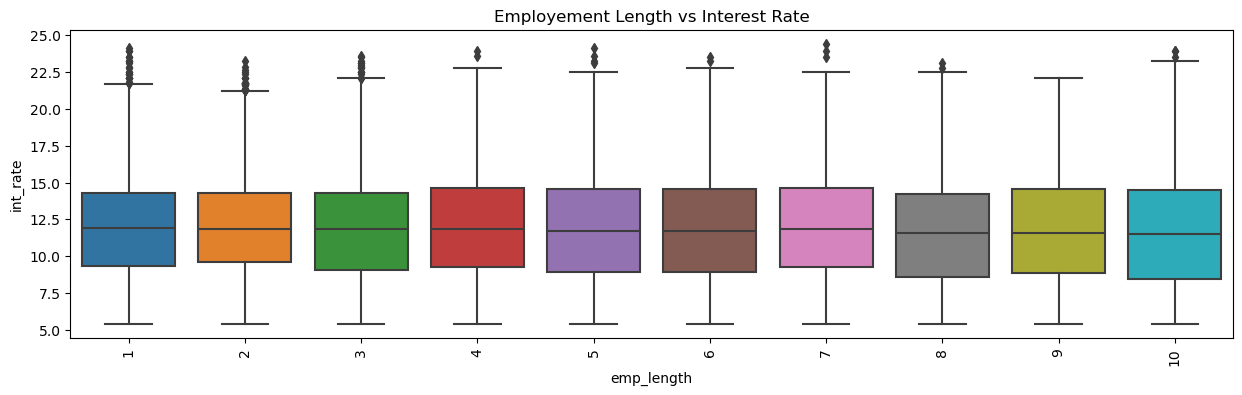

In [320]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="int_rate", data=df_loan)
plt.title("Employement Length vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

### There is no relationship found.

# Debt to income ratio with every variables.

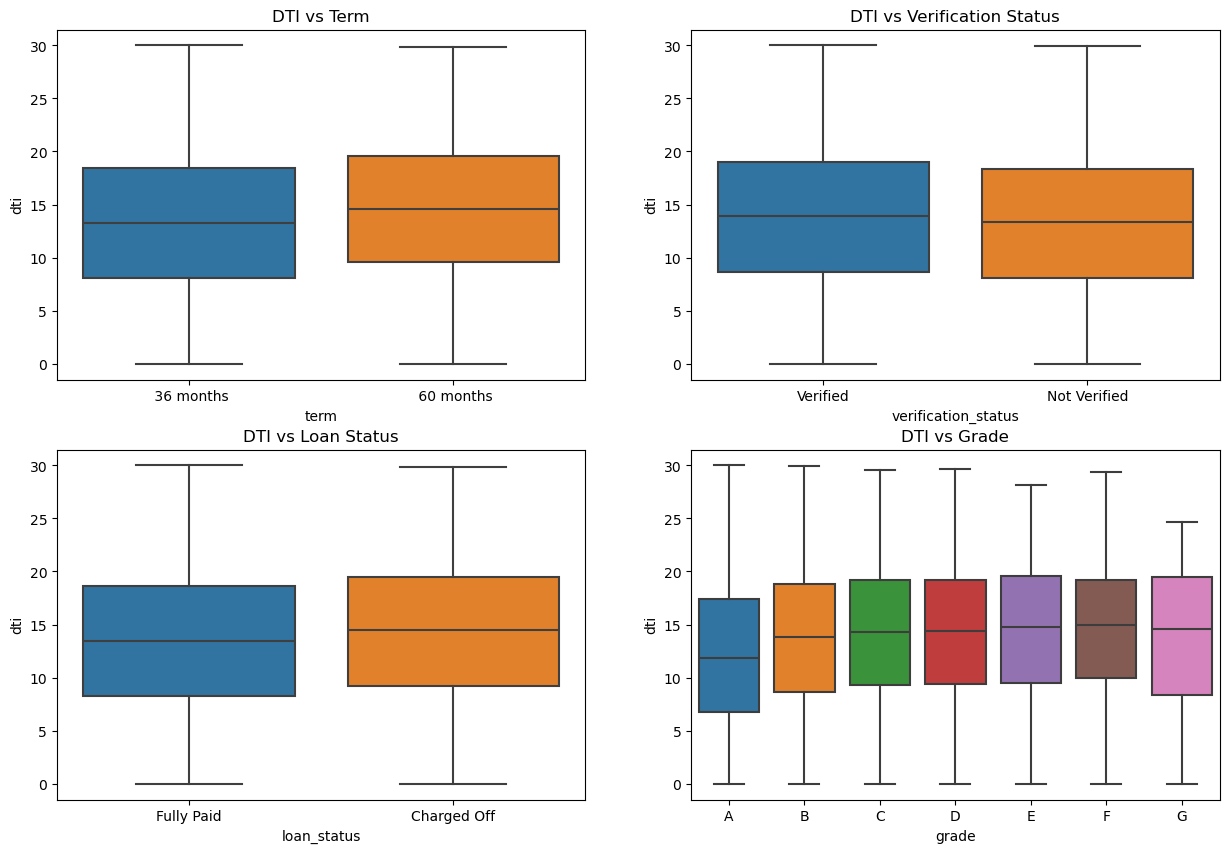

In [321]:
# DTI Plot
figure, axes = plt.subplots(2, 2, sharex=False,
                                    figsize=(15, 10))

axes[0][0].set_title('DTI vs Term')
axes[0][1].set_title('DTI vs Verification Status')
axes[1][0].set_title('DTI vs Loan Status')
axes[1][1].set_title('DTI vs Grade')

#Distribution plot
sns.boxplot(df_loan, x='term', y='dti', ax=axes[0][0])

#Distribution plot
sns.boxplot(df_loan, x="verification_status", y='dti',ax=axes[0][1])

#Distribution plot
sns.boxplot(df_loan, x='loan_status', y='dti', ax=axes[1][0])

grade_order = df_loan["grade"].unique()
grade_order.sort()
#Distribution plot
sns.boxplot(df_loan, x="grade", y='dti',order= grade_order, ax=axes[1][1])

figure.show()

### Observation

- Dti ratio is high for the borrower who has 60 months tenure.
- Verified borrowers are having high dti ratio.
- Most of the charged off borrowers are having high dti ratio.
- As grade decreases dti ratio is increasing.

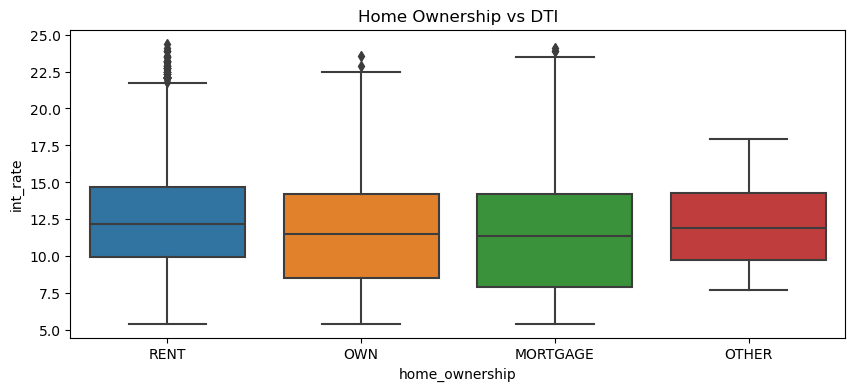

In [322]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="int_rate", data=df_loan)
plt.title("Home Ownership vs DTI")
plt.show()

### The borrower with own and rent home status are having high dti ratio than others.

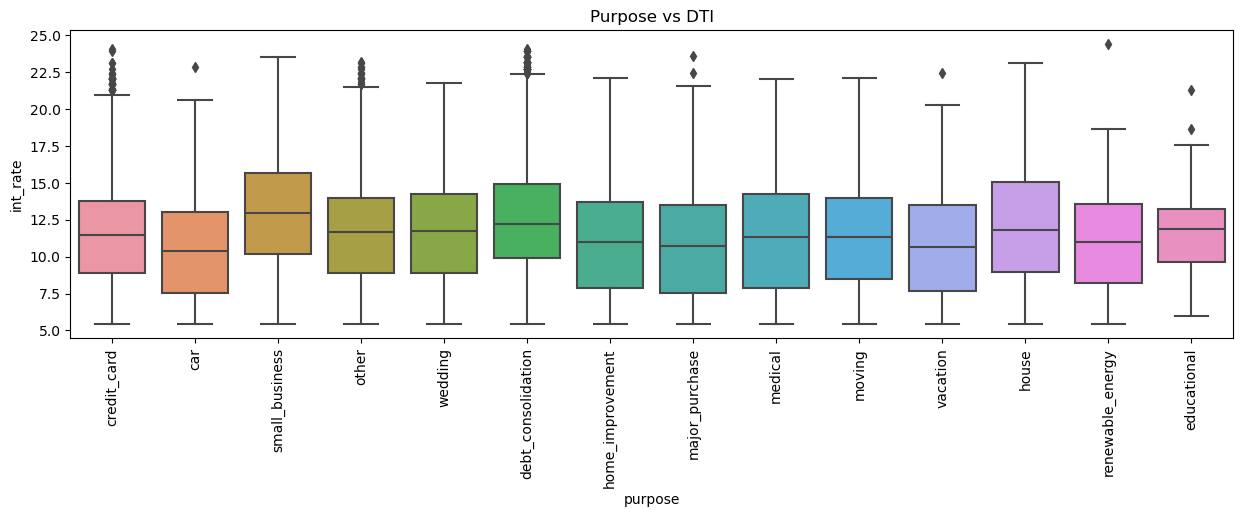

In [323]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="int_rate", data=df_loan)
plt.title("Purpose vs DTI")
plt.xticks(rotation=90)
plt.show()

### The borrower who takes loan for the purpose of debt consolidation and credit card are having high dti ratio than others.

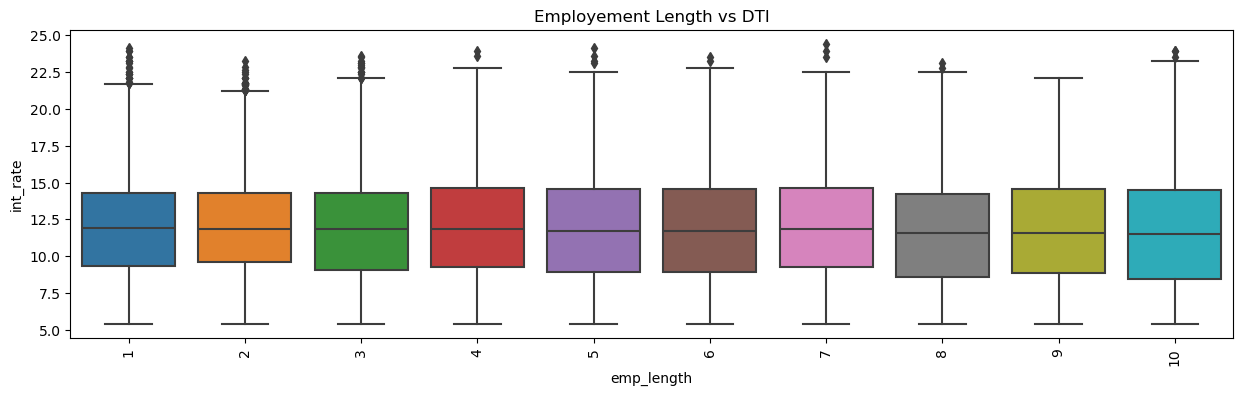

In [324]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="int_rate", data=df_loan)
plt.title("Employement Length vs DTI")
plt.xticks(rotation=90)
plt.show()

### No relation

#  Charged Off Proportion with each variables.

In [325]:
# Utility functions
def calculate_charged_off_vs_others(df_loan, variables, value_1, value_2 ):
    sub_grade_vs_loan_status = df_loan.groupby(variables).loan_status.count().unstack().fillna(0).reset_index()
    sub_grade_vs_loan_status['Total'] = sub_grade_vs_loan_status[value_1] + sub_grade_vs_loan_status[value_2]
    sub_grade_vs_loan_status['Proportion'] = sub_grade_vs_loan_status[value_1] / sub_grade_vs_loan_status['Total']
    return sub_grade_vs_loan_status.sort_values('Proportion', ascending=False)

def plot_relation(data_frame, title, variable, xlabel, ylabel):
    fig, ax1 = plt.subplots(figsize=(12, 5))
    ax1.set_title(title,fontsize=15)
    ax1=sns.barplot(x=variable, y='Proportion', data=data_frame)
    ax1.set_xlabel(xlabel,fontsize=14)
    ax1.set_ylabel(ylabel,fontsize=14)
    plt.show()


In [326]:
annual_inc_bin_vs_loan_status = calculate_charged_off_vs_others(df_loan,['annual_inc_bin', 'loan_status'], 'Charged Off','Fully Paid' )
annual_inc_bin_vs_loan_status

loan_status,annual_inc_bin,Charged Off,Fully Paid,Total,Proportion
0,0-20k,232,908,1140,0.203509
1,20k-40k,1484,6849,8333,0.178087
2,40k-60k,1705,9384,11089,0.153756
3,60k-80k,995,6496,7491,0.132826
4,80k+,890,7053,7943,0.112048


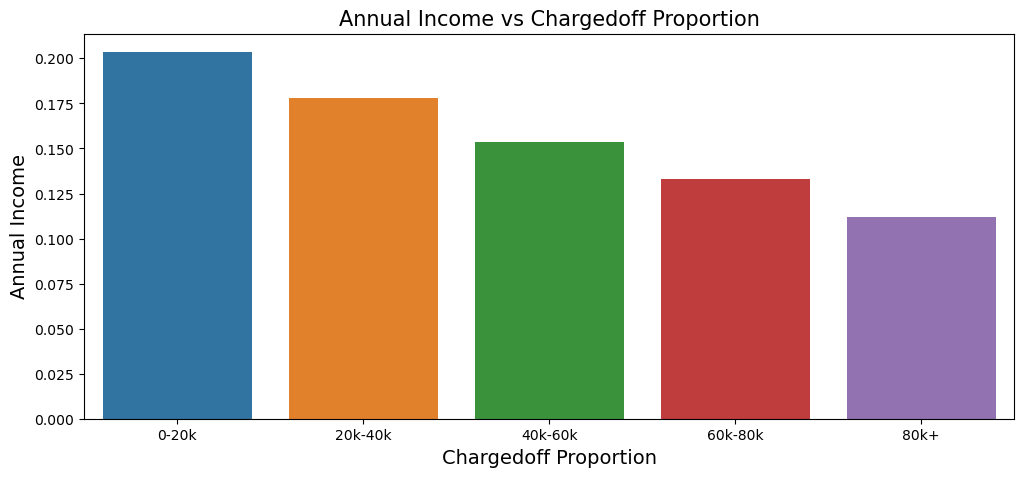

In [327]:

plot_relation(annual_inc_bin_vs_loan_status, 'Annual Income vs Chargedoff Proportion','annual_inc_bin','Chargedoff Proportion', 'Annual Income')


- From above chart we can say that, as annual income is increasing charged off proportion is decreasing.
- So highest charged off proportion are in the range 0 to 20k annual income.

In [328]:
purpose_vs_loan_status=calculate_charged_off_vs_others(df_loan,['purpose', 'loan_status'], 'Charged Off','Fully Paid' )
purpose_vs_loan_status

loan_status,purpose,Charged Off,Fully Paid,Total,Proportion
11,small_business,438,1137,1575,0.278095
10,renewable_energy,18,77,95,0.189474
3,educational,51,243,294,0.173469
9,other,591,3007,3598,0.164258
7,medical,103,532,635,0.162205
5,house,54,280,334,0.161677
8,moving,87,454,541,0.160813
2,debt_consolidation,2627,14394,17021,0.154339
12,vacation,52,307,359,0.144847
4,home_improvement,314,2205,2519,0.124653


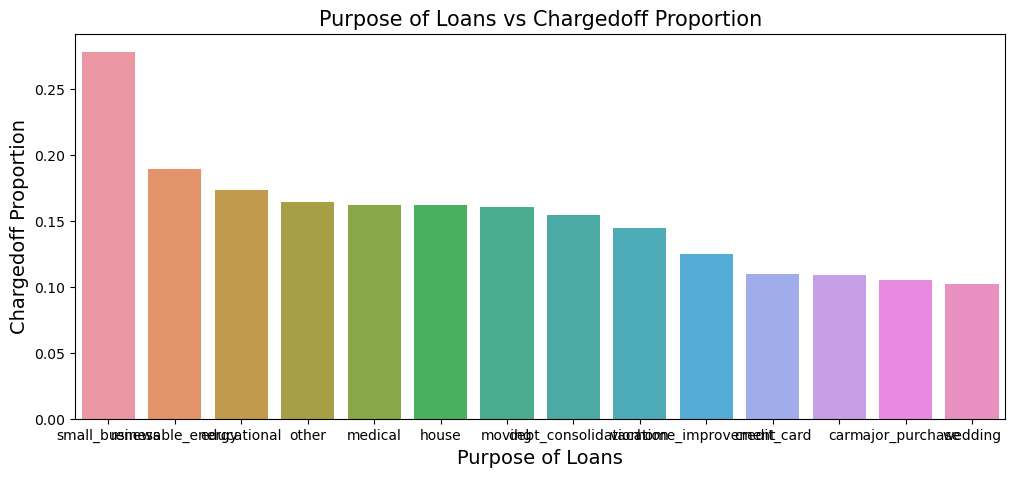

In [329]:
plot_relation(purpose_vs_loan_status, 'Purpose of Loans vs Chargedoff Proportion','purpose','Purpose of Loans', 'Chargedoff Proportion')


### the borrower who take loan for the purpose of small-business has the maximum charged off proportion.

In [330]:
grade_vs_loan_status = calculate_charged_off_vs_others(df_loan,['grade', 'loan_status'], 'Charged Off','Fully Paid' )
grade_vs_loan_status

loan_status,grade,Charged Off,Fully Paid,Total,Proportion
6,G,95,164,259,0.366795
5,F,285,588,873,0.326460
4,E,651,1764,2415,0.269565
3,D,1047,3679,4726,0.221540
2,C,1292,6014,7306,0.176841
1,B,1349,9554,10903,0.123727
0,A,587,8927,9514,0.061699


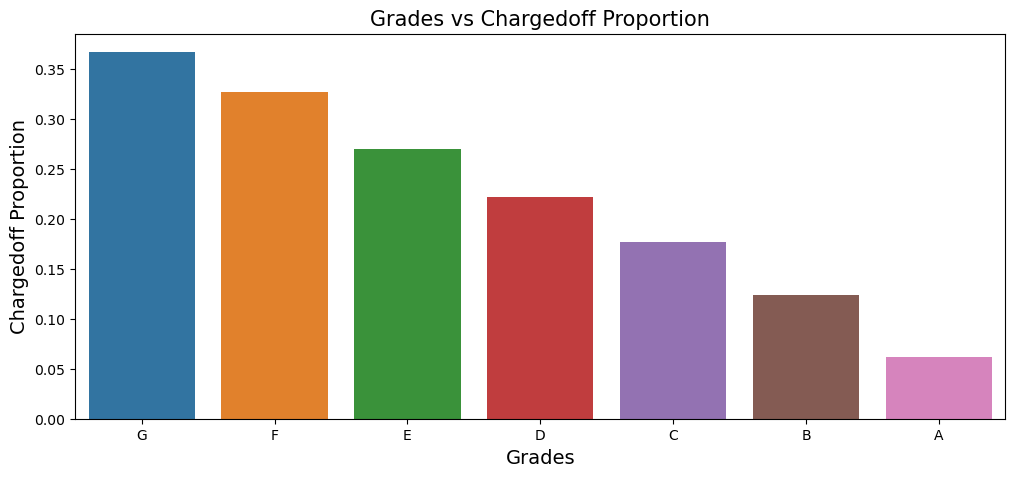

In [331]:

plot_relation(grade_vs_loan_status, 'Grades vs Chargedoff Proportion','grade','Grades', 'Chargedoff Proportion')


### grades are decreasing charged off proportion is increasing.

In [332]:
sub_grade_vs_loan_status= calculate_charged_off_vs_others(df_loan,['sub_grade', 'loan_status'], 'Charged Off','Fully Paid' )
sub_grade_vs_loan_status

loan_status,sub_grade,Charged Off,Fully Paid,Total,Proportion
29,F5,49,48,97,0.505155
32,G3,19,21,40,0.475000
34,G5,9,12,21,0.428571
31,G2,26,40,66,0.393939
30,G1,30,57,87,0.344828
28,F4,46,90,136,0.338235
26,F2,66,146,212,0.311321
23,E4,115,269,384,0.299479
27,F3,45,109,154,0.292208
25,F1,79,195,274,0.288321


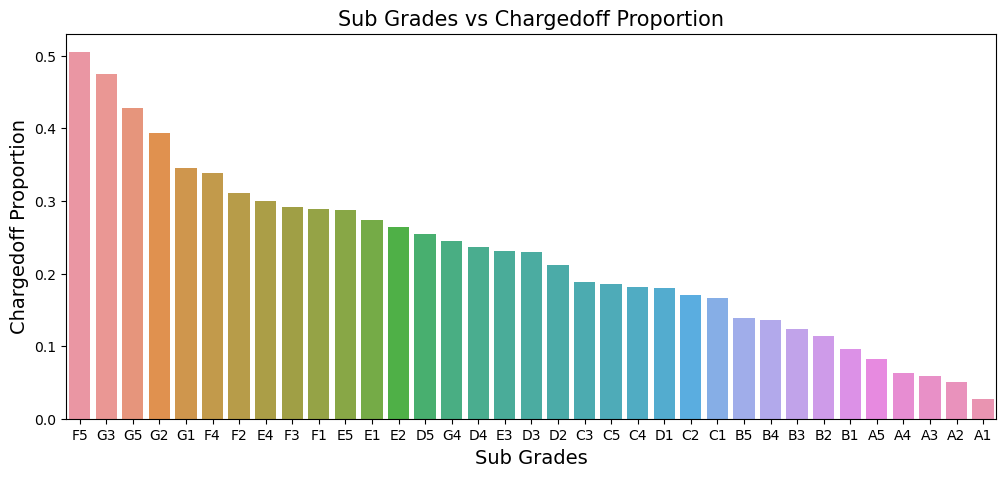

In [333]:

plot_relation(sub_grade_vs_loan_status, 'Sub Grades vs Chargedoff Proportion','sub_grade','Sub Grades', 'Chargedoff Proportion')


### Subgrade F5, G3 and G5 are having maximum charged off proportion.

In [334]:
int_rate_bin_vs_loan_status=calculate_charged_off_vs_others(df_loan,['int_rate_bin', 'loan_status'], 'Charged Off','Fully Paid' )
int_rate_bin_vs_loan_status

loan_status,int_rate_bin,Charged Off,Fully Paid,Total,Proportion
3,20-25,268,405,673,0.398217
2,15-20,1702,5059,6761,0.251738
1,10-15,2549,14456,17005,0.149897
0,5-10,787,10770,11557,0.068097


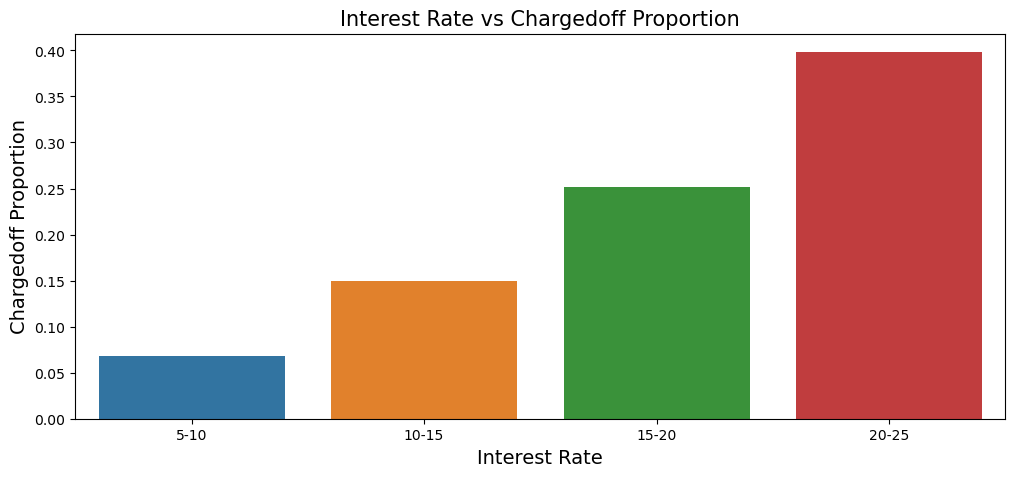

In [335]:

plot_relation(int_rate_bin_vs_loan_status, 'Interest Rate vs Chargedoff Proportion','int_rate_bin','Interest Rate', 'Chargedoff Proportion')


- As interest rate are increasing, charged off proportion is also increasing.
- The borrower who takes loan at the interest rate of 15 to 20 are getting mostly charged off.

In [336]:
emp_length_vs_loan_status=calculate_charged_off_vs_others(df_loan,['emp_length', 'loan_status'], 'Charged Off','Fully Paid' )
emp_length_vs_loan_status


loan_status,emp_length,Charged Off,Fully Paid,Total,Proportion
9,10,1468,7322,8790,0.167008
6,7,247,1375,1622,0.152281
4,5,437,2575,3012,0.145086
7,8,191,1129,1320,0.144697
0,1,1027,6095,7122,0.144201
5,6,289,1754,2043,0.141459
2,3,530,3235,3765,0.140770
3,4,432,2725,3157,0.136839
1,2,536,3489,4025,0.133168
8,9,149,991,1140,0.130702


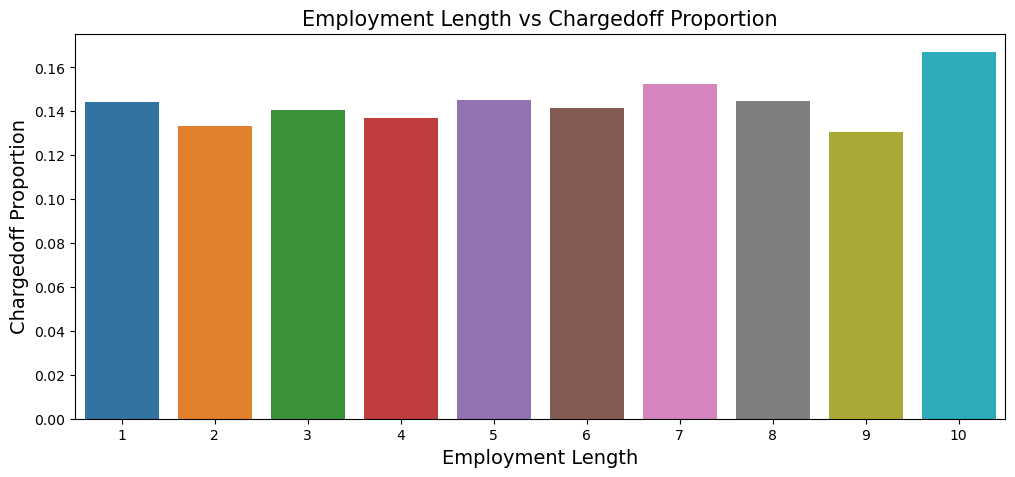

In [337]:

plot_relation(emp_length_vs_loan_status, 'Employment Length vs Chargedoff Proportion','emp_length','Employment Length', 'Chargedoff Proportion')


- The borrowers whose employee length is less than equal 1 year, 1 year and 10+ year are mostly getting charged off.

In [338]:
addr_state_vs_loan_status=calculate_charged_off_vs_others(df_loan,['addr_state', 'loan_status'], 'Charged Off','Fully Paid' )
addr_state_vs_loan_status.head()

loan_status,addr_state,Charged Off,Fully Paid,Total,Proportion
31,NV,103.0,351.0,454.0,0.226872
40,TN,2.0,8.0,10.0,0.200000
39,SD,12.0,49.0,61.0,0.196721
0,AK,13.0,57.0,70.0,0.185714
9,FL,468.0,2137.0,2605.0,0.179655


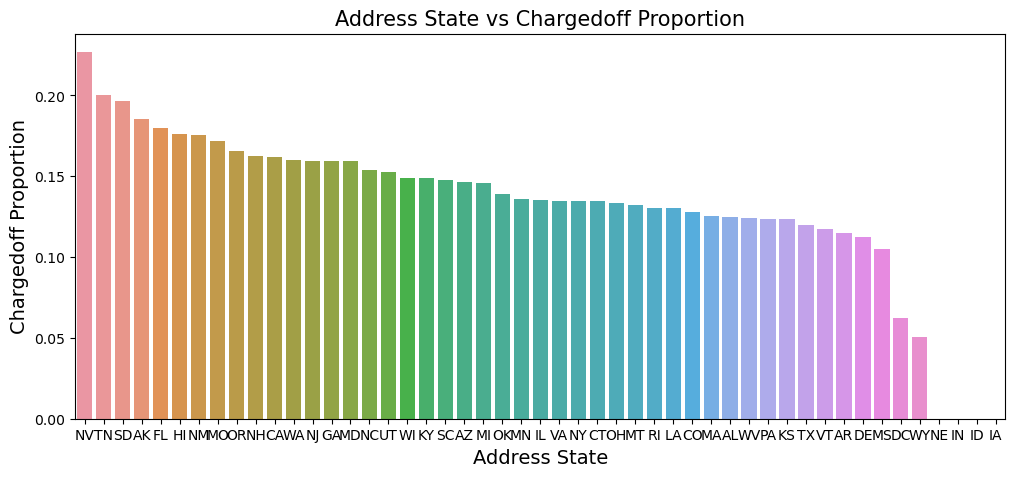

In [339]:

plot_relation(addr_state_vs_loan_status, 'Address State vs Chargedoff Proportion','addr_state','Address State', 'Chargedoff Proportion')


- The borrowers who are from NV,TN, SD, AK state are mostly getting charged off.

# MultiVariate Analysis


In [377]:
correlation_df = df_loan.copy()
# Dropping columns which are irrelevant to analysis
correlation_df = correlation_df.drop(['id','issue_d_year', 'issue_d_month','installment','grade','sub_grade',
                                      'home_ownership','approved_loan_amount_percent','loan_amnt_bin','annual_inc_bin',
                                   'int_rate_bin', 'dti_bin','issue_month_bin', 'loan_status_flag' , 'verification_status',
                                     'purpose','addr_state','loan_status'], axis = 1)
correlation_df=correlation_df.replace(' 36 months', '36')
correlation_df=correlation_df.replace(' 60 months', '60')
correlation_df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,issue_d,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,10,24000.0,2011-12-01,27.65,0.0
1,2500,2500,2500.0,60,15.27,1,30000.0,2011-12-01,1.00,0.0
2,2400,2400,2400.0,36,15.96,10,12252.0,2011-12-01,8.72,0.0
3,10000,10000,10000.0,36,13.49,10,49200.0,2011-12-01,20.00,0.0
5,5000,5000,5000.0,36,7.90,3,36000.0,2011-12-01,11.20,0.0


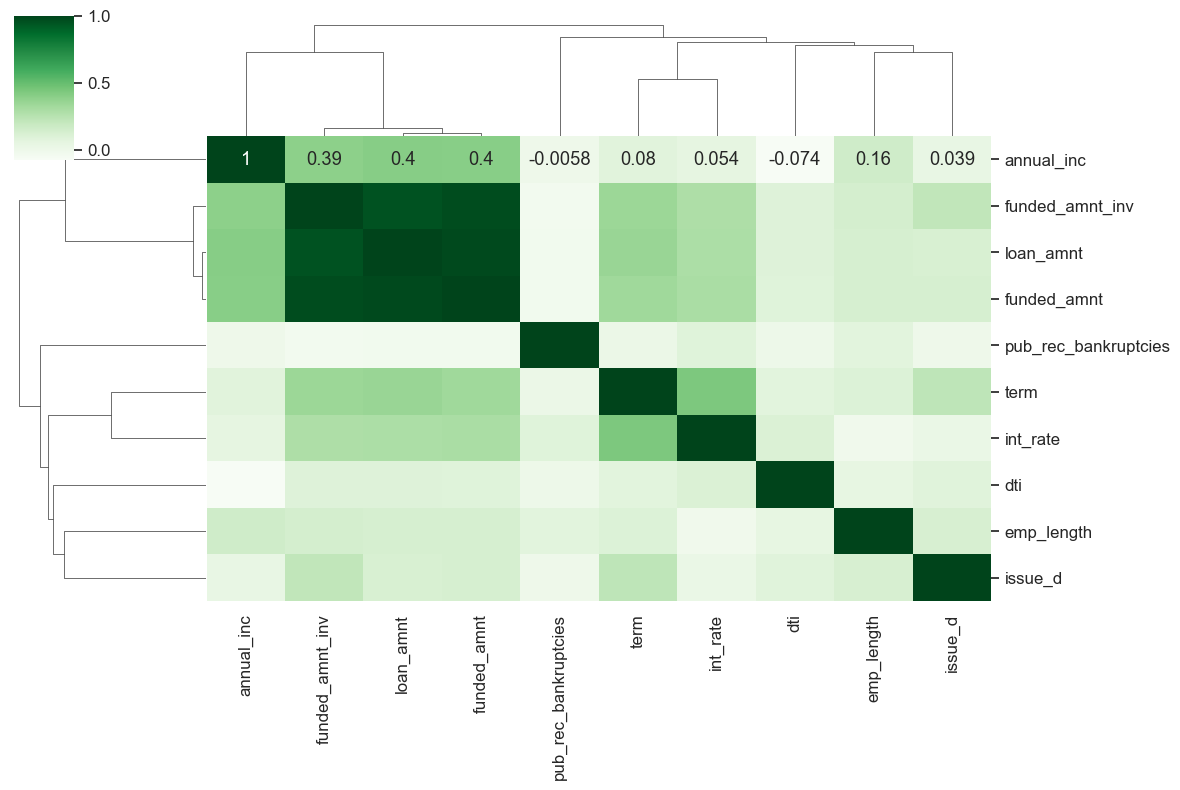

In [378]:

corr = correlation_df.corr()
sns.set(font_scale=1.1)

sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Greens")
plt.show()




## Inferences from Correlation Metrics

### Strong Correlation
- `installment` has a strong correlation with funded_amnt, loan_amnt, and funded_amnt_inv
- `term` has a strong correlation with interest rate
- `annual_inc` has a strong correlation with loan_amount


### Weak Correlation
- `dti` has weak correlation with most of the fields
- `emp_length` has weak correlation with most of the fields


### Negative Correlation
- `pub_rec_bankrupticies` has a negative correlation with almost every field
- `annual_inc` has a negative correlation with dti

# Results

After analyzing the data, we can conclude the following points:

- Borrowers are more likely to default when they take loans for a 60-month term.
- Borrowers with a 'Verified' loan status tend to take higher loan amounts with a 60-month tenure, increasing the risk of default.
- Borrowers who rent their homes and take loans for debt consolidation purposes have a higher probability of default.
- Borrowers with an annual income in the range of 0 to 20000 are more prone to defaulting.
- Borrowers who take loan amounts in the range of 0 to 14000 have a higher default rate.
- Borrowers receiving interest rates between 15-20% are at a higher risk of default.
- Borrowers taking loans for small businesses are more likely to default.
- Borrowers with lower grade (e.g., F < G) are at an increased risk of default.
- Borrowers with subgrades F5, G3, or G5 are more likely to default.